<a href="https://colab.research.google.com/github/phanee16/Reinforcement-Learning--SARSA/blob/main/Reinforcement_Learning_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all required libraries

import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import math 

In [ ]:
#Creating the grid environment with 25 state spaces
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.reward = 0
        self.act = None
        
    def reset(self):
        self.timestep = 0
        #Assigning (0,0) as agent position in the grid environment 
        self.agent_pos = [0, 0]
        #Assigning (4,4) as goal position in the grid environment 
        self.goal_pos = [4, 4]
        #Assigning (4,2) as gold reward position in the grid environment 
        self.gold_pos = [4,2]
        #Assigning (1,2) as diamond reward position in the grid environment 
        self.diamond_pos = [1,2]
        #Assigning (0,4) as monster position in the grid environment 
        self.monster_pos = [0,4]
        #Assigning (3,1) as bomb position in the grid environment 
        self.bomb_pos = [3,1]
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 4
        self.state[tuple(self.gold_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 2
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.bomb_pos)] = 3


        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0: 
          self.act = "down"         
          self.agent_pos[0] += 1
          
        elif action == 1:
          self.act = "up" 
          self.agent_pos[0] -= 1
          
        elif action == 2:
          self.act = "right" 
          self.agent_pos[1] += 1
          
        elif action == 3:
          self.act = "left" 
          self.agent_pos[1] -= 1
        
          
          
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 4
        self.state[tuple(self.gold_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 2
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.bomb_pos)] = 3
        observation = self.state.flatten()
        
        

        if (self.agent_pos == self.goal_pos).all():
          #Reward for goal position is 10 points
          self.reward = 10
         
        elif (self.agent_pos == self.gold_pos).all():
          #Reward for gold position is 10 points
          self.reward = 3

        elif (self.agent_pos == self.diamond_pos).all():
          #Reward for diamond position is 10 points
          self.reward = 5

        elif (self.agent_pos == self.monster_pos).all():
          #Reward for monster position is 10 points
          self.reward = -5

        elif (self.agent_pos == self.bomb_pos).all():
          #Reward for bomb position is 10 points
          self.reward = -2 

        else :
          self.reward = 0
 
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        
        
        return observation, self.reward, done
        
    def render(self):
        print("*"*80)
        print("\n")
        print("The reward is :",self.reward)
        print("The agent current position is :",self.agent_pos)
        print("The action chosen is :",self.act)
        print("\n")
        
        
        plt.imshow(self.state)
        

In [ ]:
env = GridEnvironment()
obs = env.reset()


def SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma):

  #Function to choose the next action
  def action_choice(state1):
      state = state1.astype(int)
      action=0
      if np.random.uniform(0, 1) < epsilon:
          
          action = np.random.choice(env.action_space.n)
      else:
          action = np.argmax(Q_table[state,:])
      return action
  
  #Function to learn the Q_table_table-value
  def update(state, state2, reward, action, action2):
      predict = Q_table[state, action]
      target = reward + gamma * Q_table[state2, action2]
      Q_table[state, action] = Q_table[state, action] + alpha * (target - predict)
      return Q_table


  
  epsilon_decay = []
  sarsa_episode_scores = []
  best_score = -math.inf
  best_path_actions = list()
  best_score_episodes_taken = 0 

  # Starting the SARSA learning
  for episode in range(total_episodes):
      steps = 0
      state1 = env.reset()
      state1 = state1.astype(int)
      episode_score = 0
      episode_actions = []
      
      action1 = action_choice(state1)
      print(f"*******For episode : {episode}*******")
      while steps < max_steps:
          
          print(f"*******At step : {steps}******") 
          #Getting the next state
          print("\nThe state 1 is :",state1)
          print("\n The action 1 is :",action1)
          
          state2, reward, done = env.step(action1)
          episode_score += reward
          state2 = state2.astype(int)
          #Choosing the next action
          action2 = action_choice(state2)
          
          #Learning the Q_table-value
          q_table = update(state1, state2, reward, action1, action2)
          
          state1 = state2
          
          print("\nThe state 2 is :",state2) 
          action1 = action2
          print("\n The action 2 is :",action2)
          
          print("\nThe Q table is :\n",q_table)
          print("*"*80)         
          #Updating the respective vaLues
          steps += 1
          episode_actions.append(action1)
          
          output_grid = widgets.Grid(1, 1)
          with output_grid.output_to(0, 0):
            env.render() 
          #If at the end of learning process
          if done:
              break
      
           
      print(f"The total reward for the episode is :{episode_score}")
      print(f"Evaluation score is :{episode_score/total_episodes}")
      sarsa_episode_scores.append(episode_score)
      # Decay epsilon
      epsilon = max(epsilon * eps_decay_factor, eps_min)
      epsilon_decay.append(epsilon)

      # For best episode data
      if episode_score > best_score:
        best_score = episode_score
        best_path_actions = episode_actions
        best_score_episodes_taken = episode

        print(f'\rEpisode: {episode}/{total_episodes}, score: {episode_score}, Average(last 10): {sum(sarsa_episode_scores[:-10])/len(sarsa_episode_scores)}, epsilon: {epsilon}', end='')
       
      print(f'\nAfter {total_episodes}, average score: {sum(sarsa_episode_scores)/len(sarsa_episode_scores)}, Average(last 10): {sum(sarsa_episode_scores[:-10])/len(sarsa_episode_scores)}')
      plt.plot(range(len(sarsa_episode_scores)), sarsa_episode_scores, label='Sarsa')
      plt.legend(loc="lower right")
      plt.xlabel('Episodes ->')
      plt.ylabel('Reward ->')
      plt.title('Training progress')
      plt.show()
  plt.plot(epsilon_decay)
  plt.legend(loc="lower right")
  plt.xlabel('time ->')
  plt.ylabel('Epsilon decay ->')
  plt.title('Epsilon Decay rate')
  plt.show()

*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




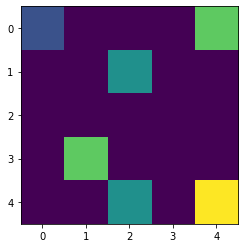

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




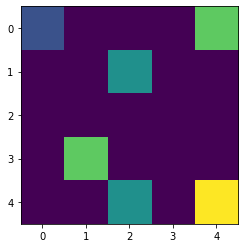

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




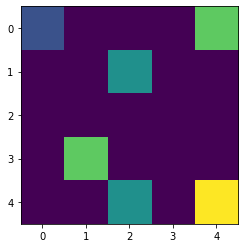

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




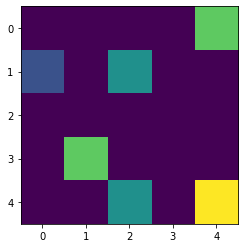

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




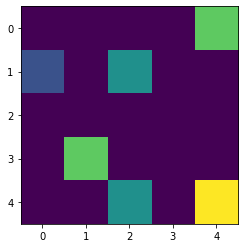

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




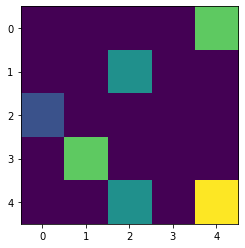

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




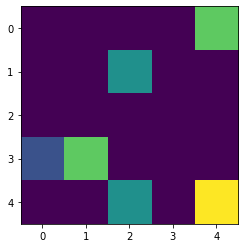

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




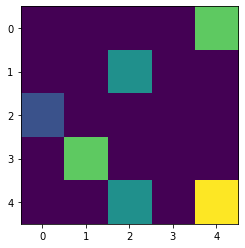

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




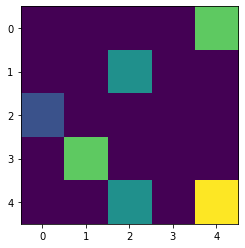

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




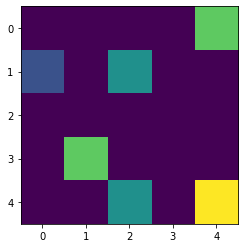

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.9
After 10, average score: 0.0, Average(last 10): 0.0


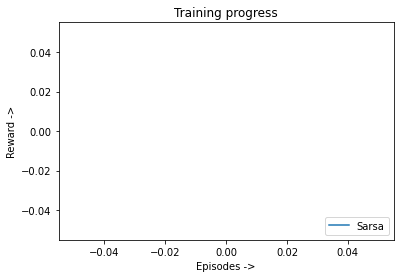

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




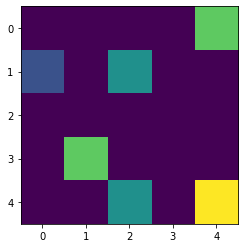

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




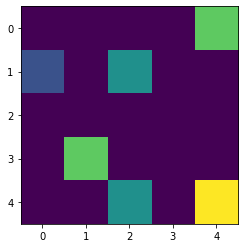

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




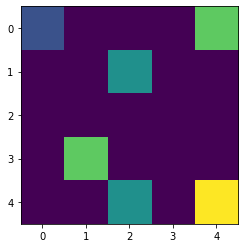

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




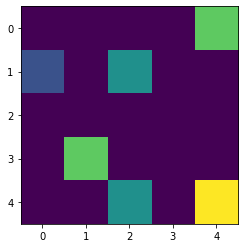

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




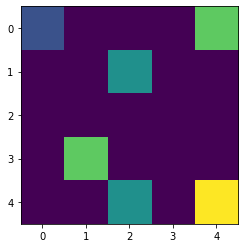

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




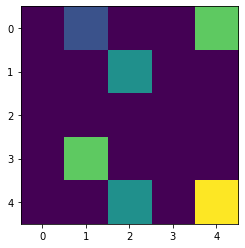

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




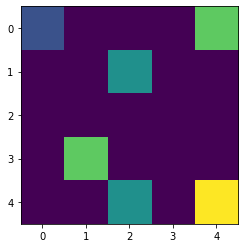

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




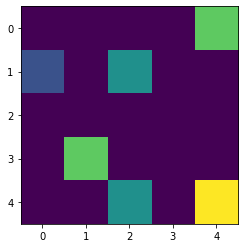

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




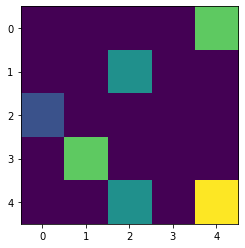

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




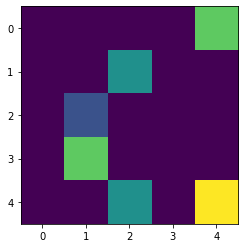

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


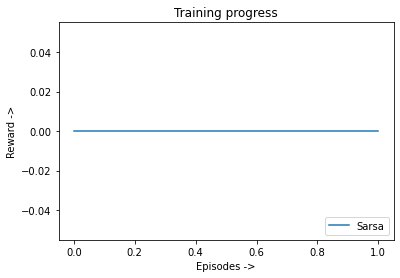

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




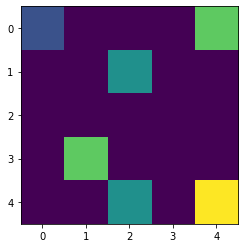

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




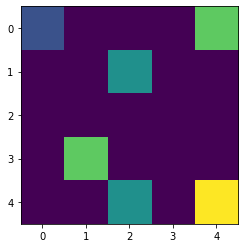

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




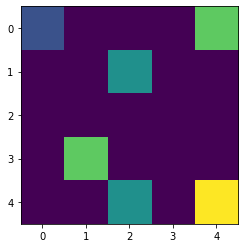

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




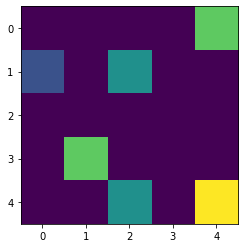

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




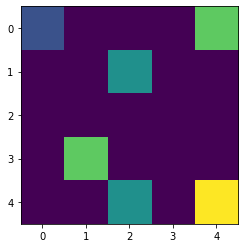

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




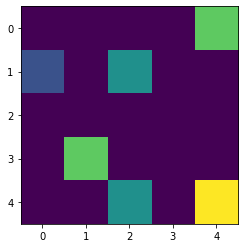

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




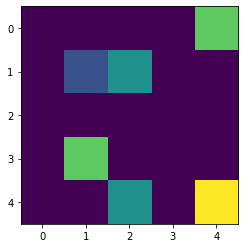

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




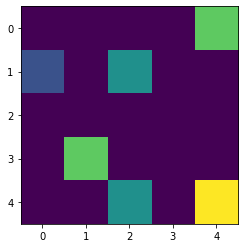

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




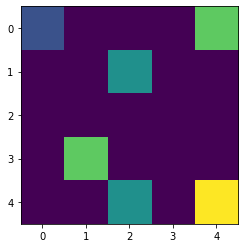

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




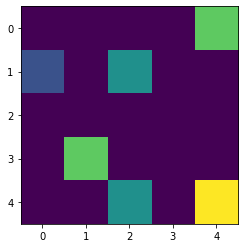

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


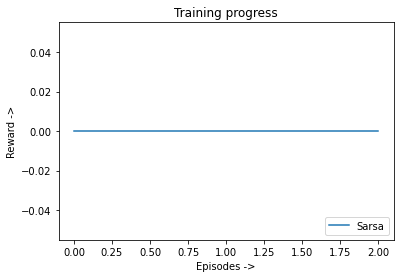

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




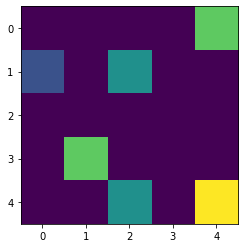

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




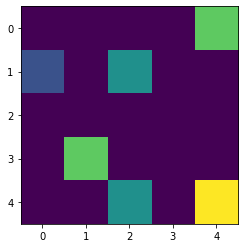

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




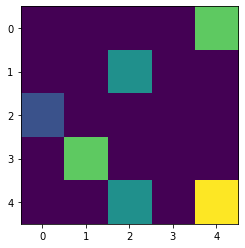

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




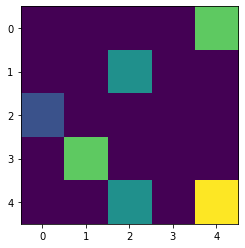

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




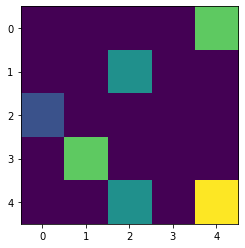

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




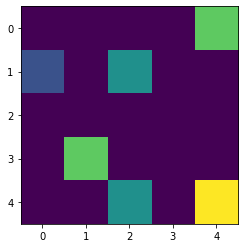

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




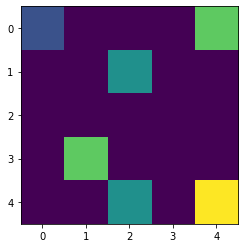

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




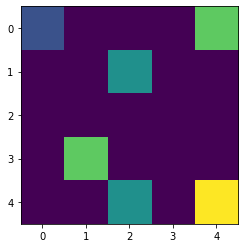

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




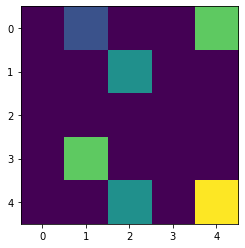

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




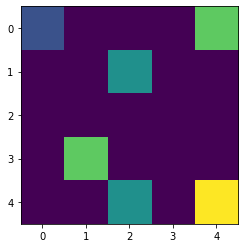

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


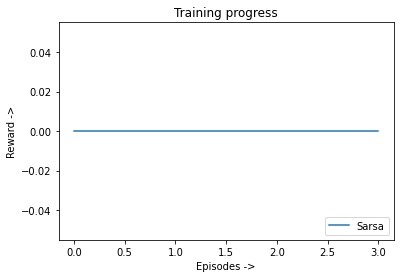

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




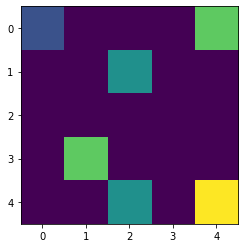

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




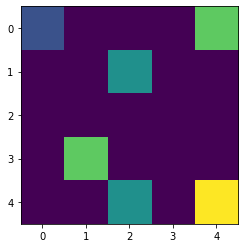

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




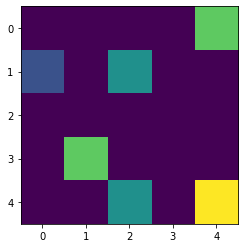

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




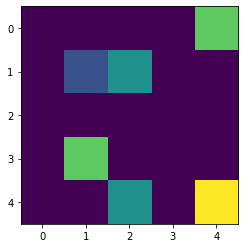

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : down




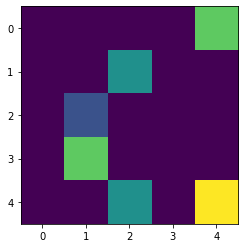

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : up




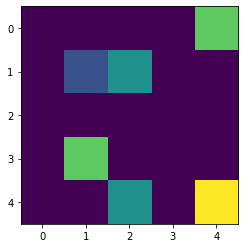

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




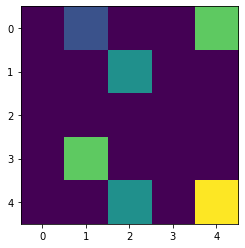

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




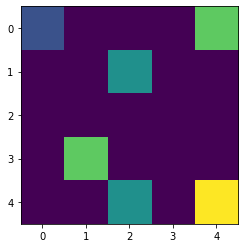

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




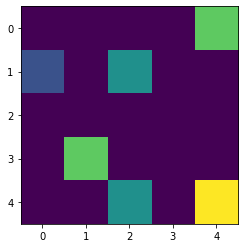

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




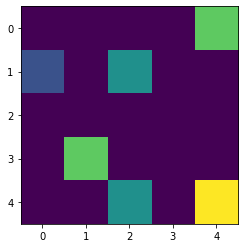

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


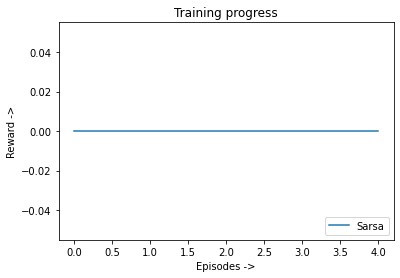

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




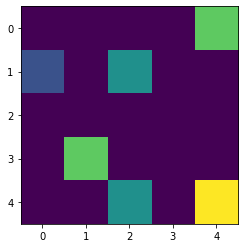

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




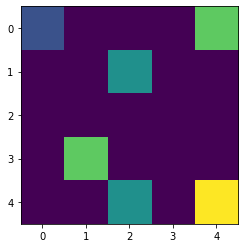

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




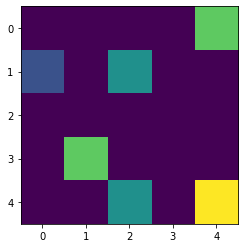

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




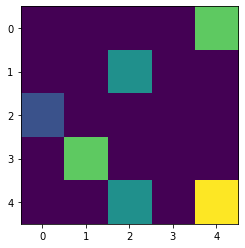

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




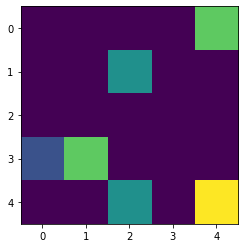

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




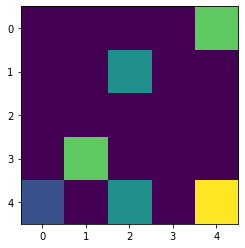

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




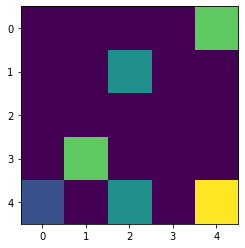

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




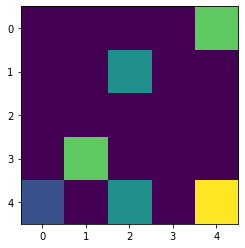

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




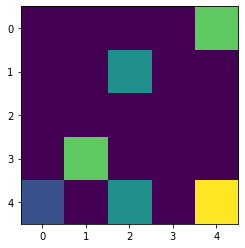

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : up




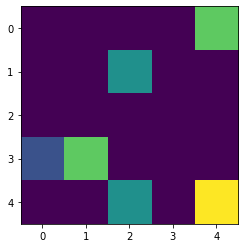

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


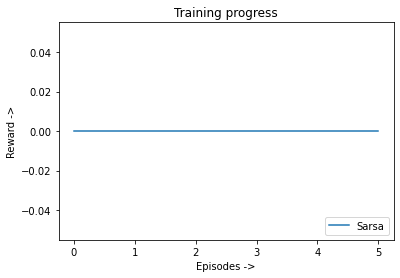

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




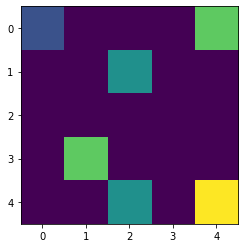

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




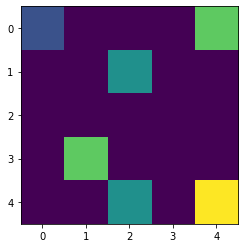

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




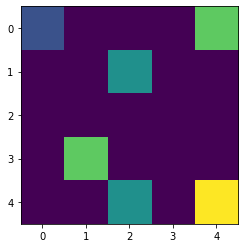

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




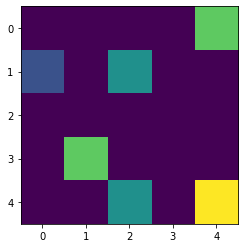

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




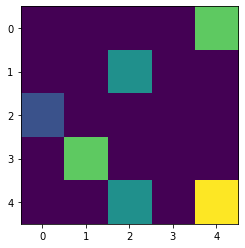

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




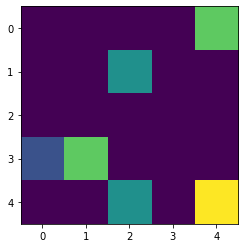

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




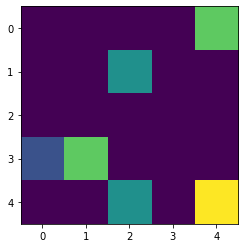

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




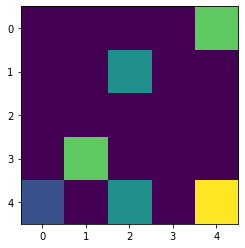

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




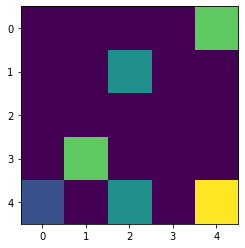

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




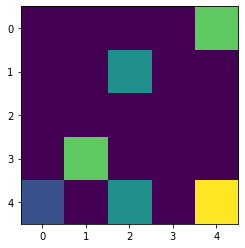

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


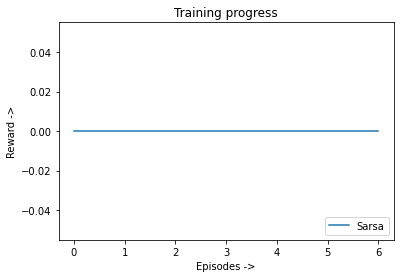

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




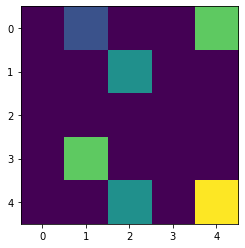

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : down




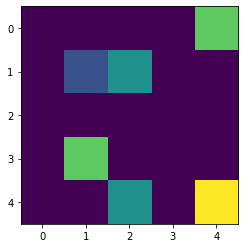

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




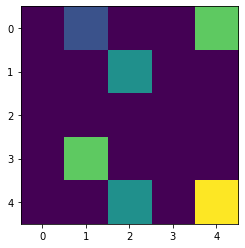

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




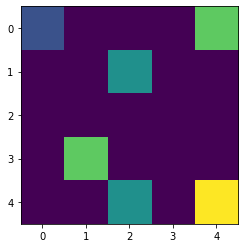

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




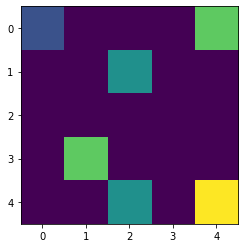

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




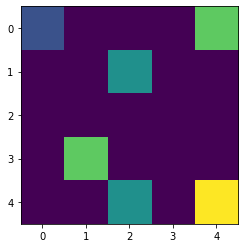

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




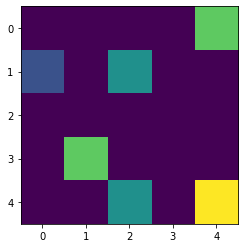

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




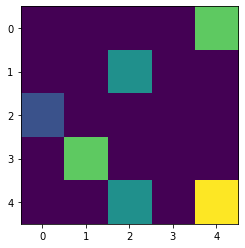

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




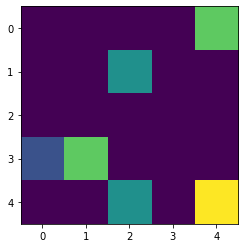

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




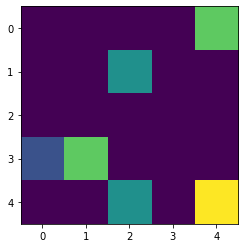

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


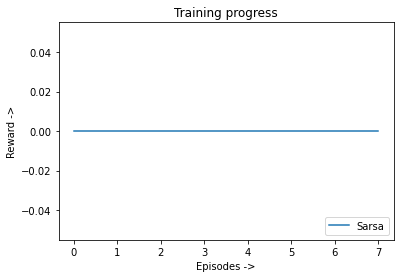

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




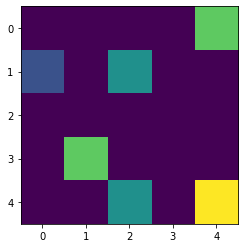

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




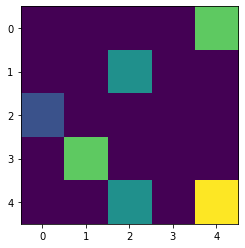

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




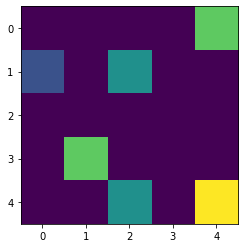

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




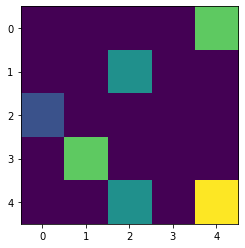

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




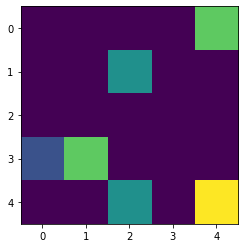

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




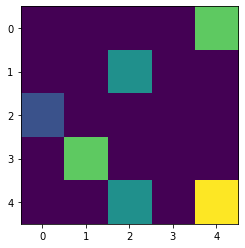

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




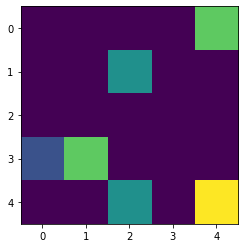

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




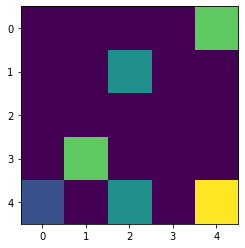

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




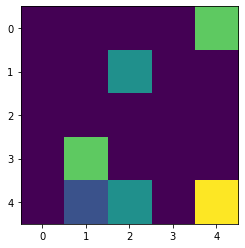

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




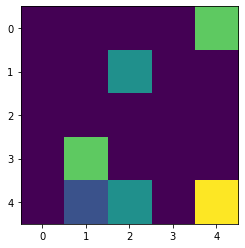

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


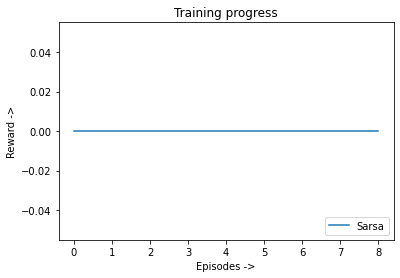

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




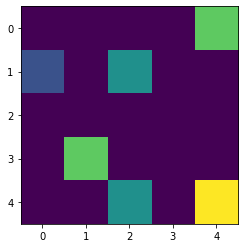

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




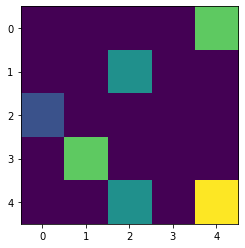

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




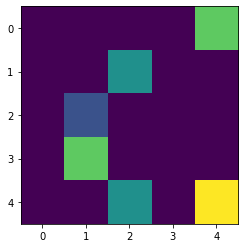

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-1.8  0.   0.   0.   0. ]
 [-1.8  0.   0.   0.   0. ]
 [-1.8  0.   0.   0.   0. ]
 [-1.8  0.   0.   0.   0. ]
 [-1.8  0.   0.   0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : down




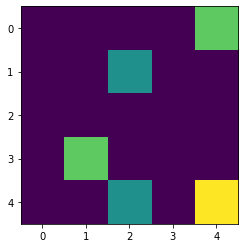

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.18  0.    0.    0.    0.  ]
 [-1.8   0.    0.    0.    0.  ]
 [-0.18  0.    0.    0.    0.  ]
 [-0.18  0.    0.    0.    0.  ]
 [-0.18  0.    0.    0.    0.  ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




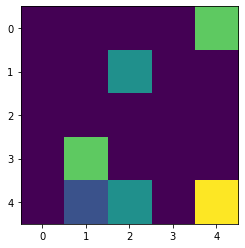

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-0.18   -1.9539  0.      0.      0.    ]
 [-1.8    -1.9539  0.      0.      0.    ]
 [-0.18   -1.9539  0.      0.      0.    ]
 [-0.18   -1.9539  0.      0.      0.    ]
 [-0.18   -1.9539  0.      0.      0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : up




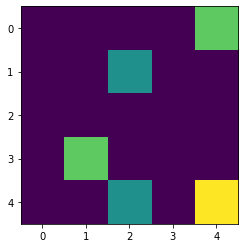

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.018  -1.9539  0.      0.      0.    ]
 [-1.8    -1.9539  0.      0.      0.    ]
 [-0.018  -1.9539  0.      0.      0.    ]
 [-0.018  -1.9539  0.      0.      0.    ]
 [-0.018  -1.9539  0.      0.      0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




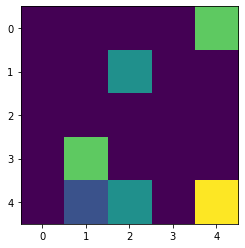

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.018  -1.9539  2.7     0.      0.    ]
 [-1.8    -1.9539  2.7     0.      0.    ]
 [-0.018  -1.9539  2.7     0.      0.    ]
 [-0.018  -1.9539  2.7     0.      0.    ]
 [-0.018  -1.9539  2.7     0.      0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 3
The agent current position is : [4 2]
The action chosen is : right




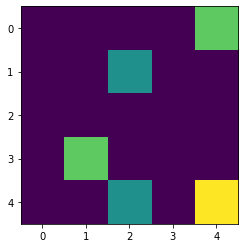

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 1 4]

 The action 2 is : 3

The Q table is :
 [[-0.018  -1.9539  0.27    0.      0.    ]
 [-1.8    -1.9539  2.7     0.      0.    ]
 [-0.018  -1.9539  0.27    0.      0.    ]
 [-0.018  -1.9539  0.27    0.      0.    ]
 [-0.018  -1.9539  0.27    0.      0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 3]
The action chosen is : right




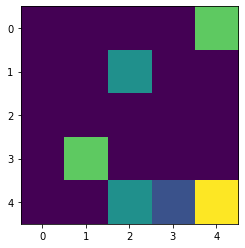

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 1 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.018   -1.9539   0.27     2.93085  0.     ]
 [-1.8     -1.9539   2.7      2.93085  0.     ]
 [-0.018   -1.9539   0.27     2.93085  0.     ]
 [-0.018   -1.9539   0.27     2.93085  0.     ]
 [-0.018   -1.9539   0.27     2.93085  0.     ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 3
The agent current position is : [4 2]
The action chosen is : left




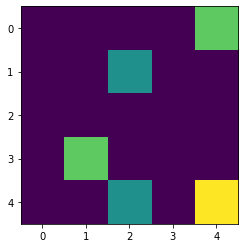

<IPython.core.display.Javascript object>

The total reward for the episode is :2
Evaluation score is :0.2
Episode: 9/10, score: 2, Average(last 10): 0.0, epsilon: 0.34867844010000015
After 10, average score: 0.2, Average(last 10): 0.0


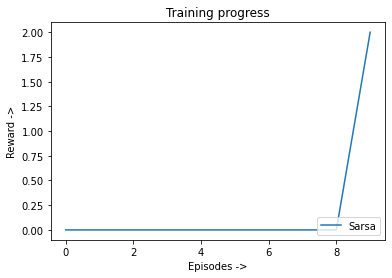

No handles with labels found to put in legend.


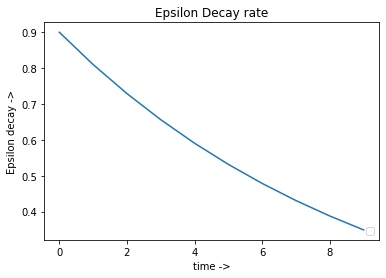

In [ ]:
#Defining the different parameters
epsilon = 1
eps_decay_factor = 0.9
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.95
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)


*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




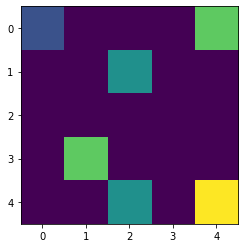

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




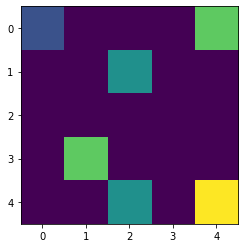

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




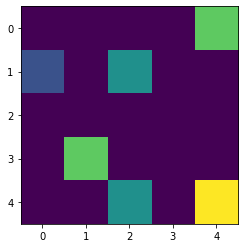

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




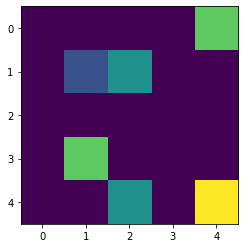

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




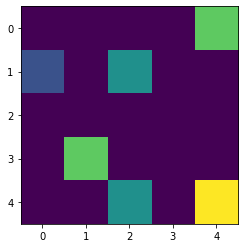

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




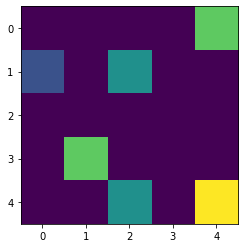

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




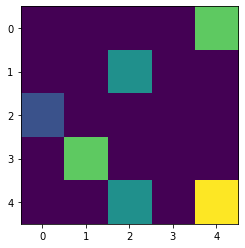

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




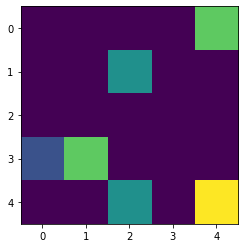

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




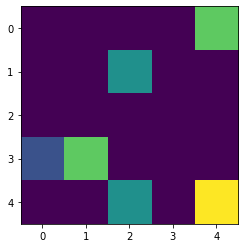

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




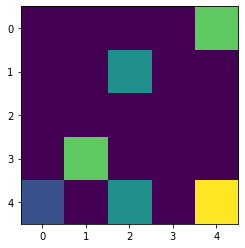

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.9
After 10, average score: 0.0, Average(last 10): 0.0


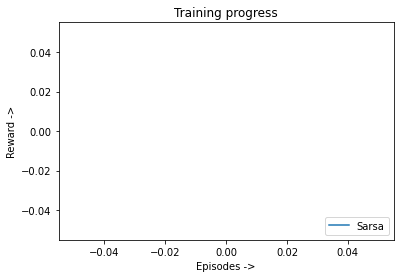

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




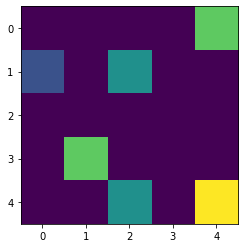

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




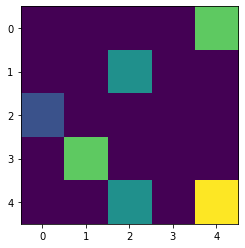

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




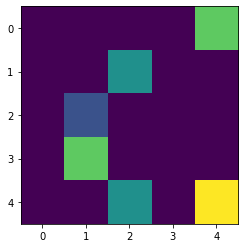

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




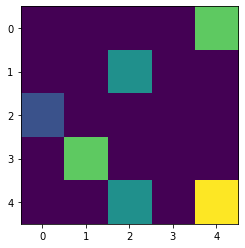

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




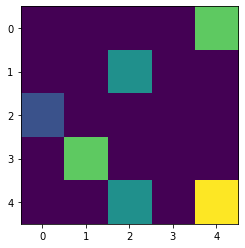

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




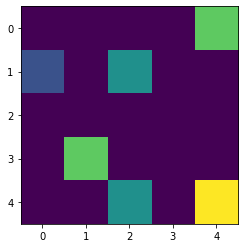

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




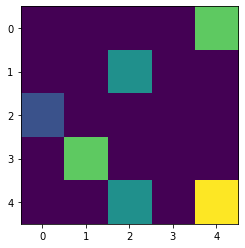

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




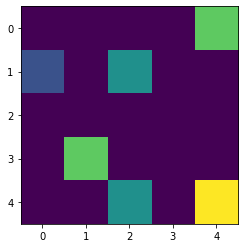

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




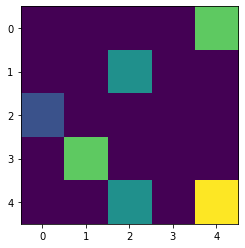

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




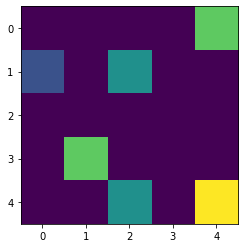

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


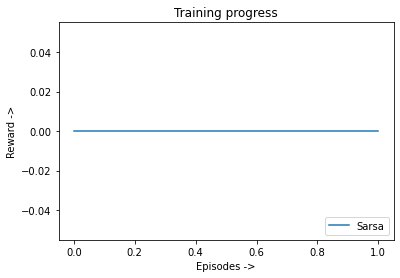

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




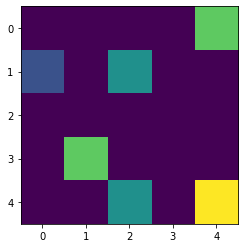

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




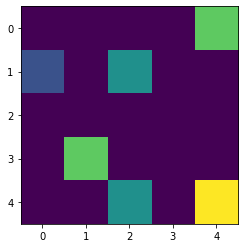

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




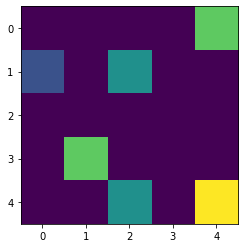

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




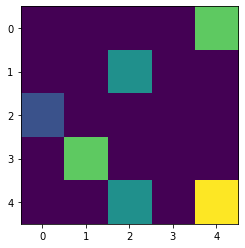

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




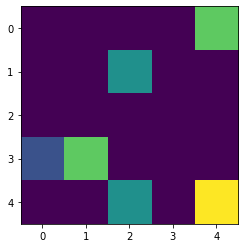

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




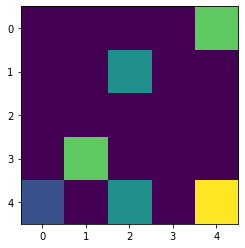

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




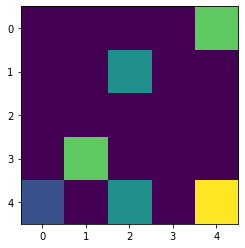

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : up




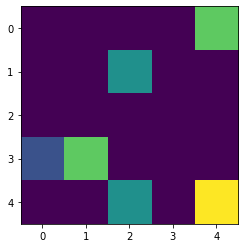

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : right




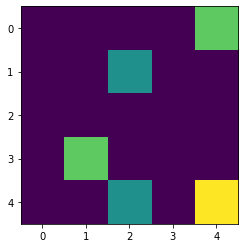

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




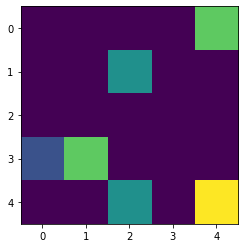

<IPython.core.display.Javascript object>

The total reward for the episode is :-2
Evaluation score is :-0.2

After 10, average score: -0.6666666666666666, Average(last 10): 0.0


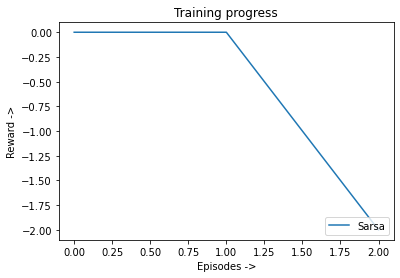

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




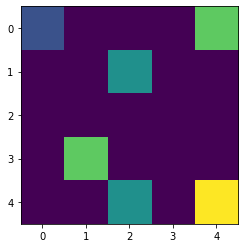

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




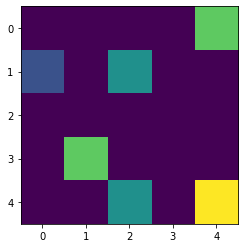

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




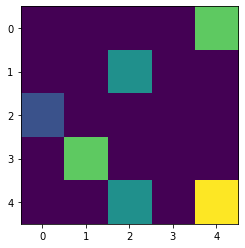

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




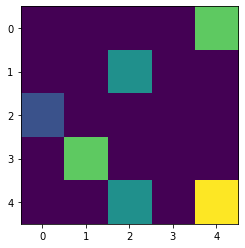

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




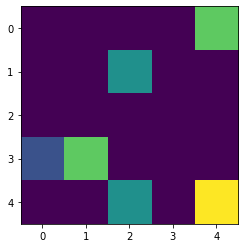

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




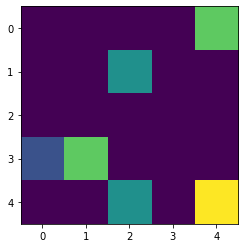

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




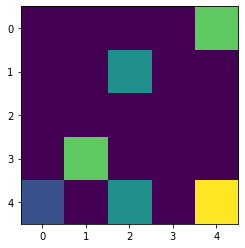

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[ 0.     0.    -1.8   -0.324  0.   ]
 [ 0.     0.    -1.8   -0.324  0.   ]
 [ 0.     0.    -1.8   -0.324  0.   ]
 [ 0.     0.    -1.8   -0.324  0.   ]
 [ 0.     0.    -1.8   -0.324  0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




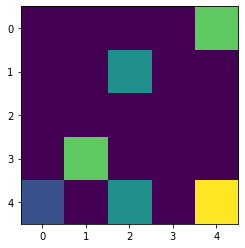

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.     0.    -0.18  -0.324  0.   ]
 [ 0.     0.    -0.18  -0.324  0.   ]
 [ 0.     0.    -0.18  -0.324  0.   ]
 [ 0.     0.    -0.18  -0.324  0.   ]
 [ 0.     0.    -0.18  -0.324  0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




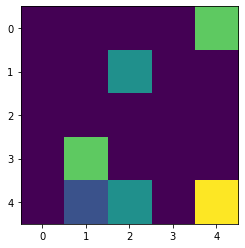

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.0324  0.     -0.18   -0.324   0.    ]
 [-0.0324  0.     -0.18   -0.324   0.    ]
 [-0.0324  0.     -0.18   -0.324   0.    ]
 [-0.0324  0.     -0.18   -0.324   0.    ]
 [-0.0324  0.     -0.18   -0.324   0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




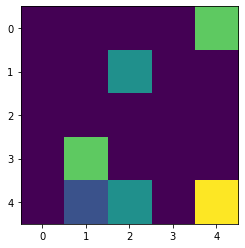

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.5, Average(last 10): 0.0


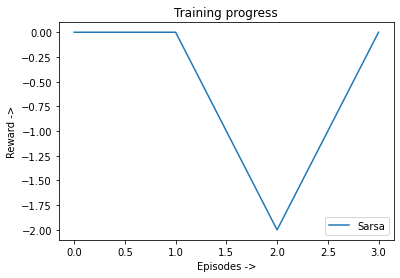

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.0324  0.     -0.018  -0.324   0.    ]
 [-0.0324  0.     -0.018  -0.324   0.    ]
 [-0.0324  0.     -0.018  -0.324   0.    ]
 [-0.0324  0.     -0.018  -0.324   0.    ]
 [-0.0324  0.     -0.018  -0.324   0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




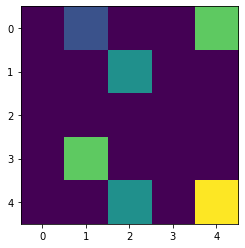

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.0324  -0.00324 -0.018   -0.324    0.     ]
 [-0.0324  -0.00324 -0.018   -0.324    0.     ]
 [-0.0324  -0.00324 -0.018   -0.324    0.     ]
 [-0.0324  -0.00324 -0.018   -0.324    0.     ]
 [-0.0324  -0.00324 -0.018   -0.324    0.     ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




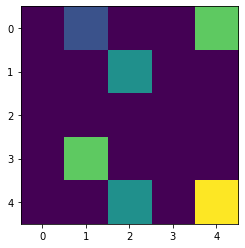

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.0324    -0.00324   -0.0023832 -0.324      0.       ]
 [-0.0324    -0.00324   -0.0023832 -0.324      0.       ]
 [-0.0324    -0.00324   -0.0023832 -0.324      0.       ]
 [-0.0324    -0.00324   -0.0023832 -0.324      0.       ]
 [-0.0324    -0.00324   -0.0023832 -0.324      0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : right




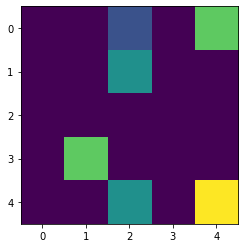

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.0324     -0.00075298 -0.0023832  -0.324       0.        ]
 [-0.0324     -0.00075298 -0.0023832  -0.324       0.        ]
 [-0.0324     -0.00075298 -0.0023832  -0.324       0.        ]
 [-0.0324     -0.00075298 -0.0023832  -0.324       0.        ]
 [-0.0324     -0.00075298 -0.0023832  -0.324       0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : up




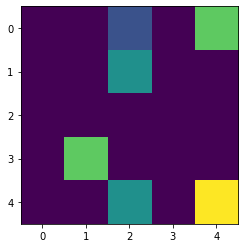

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-0.0324     -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.0324     -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.0324     -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.0324     -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.0324     -0.00075298 -0.00607032 -0.324       0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 3]
The action chosen is : right




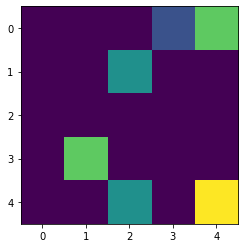

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.00324    -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.00324    -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.00324    -0.00075298 -0.00607032 -0.324       0.        ]
 [-0.00324    -0.00075298 -0.00607032 -0.324       0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : down




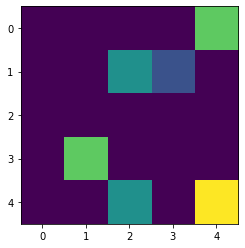

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.00324    -0.00075298 -0.00607032 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.00607032 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.00607032 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.00607032 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.00607032 -0.324      -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : down




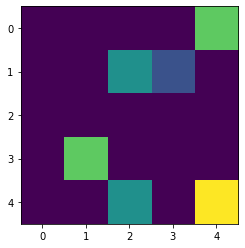

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 1 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00324    -0.00075298 -0.05892703 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.324      -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.324      -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 4]
The action chosen is : right




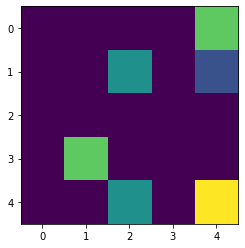

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 1 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.00324    -0.00075298 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00075298 -0.05892703 -0.03253554 -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : left




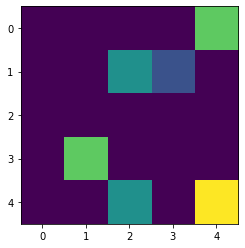

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.00324    -0.00021083 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00021083 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00021083 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00021083 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.00021083 -0.05892703 -0.03253554 -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 3]
The action chosen is : up




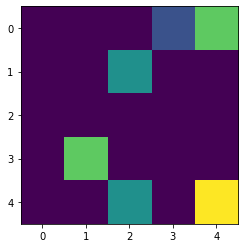

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.4, Average(last 10): 0.0


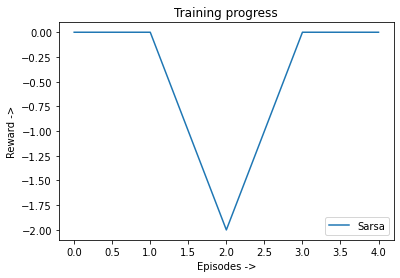

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.00324    -0.01062795 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.05892703 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.05892703 -0.03253554 -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




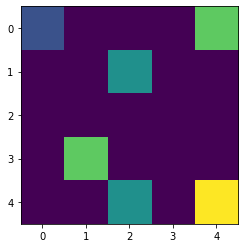

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00109266]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00109266]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




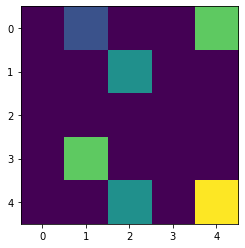

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00030594]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00030594]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00030594]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00030594]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00030594]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




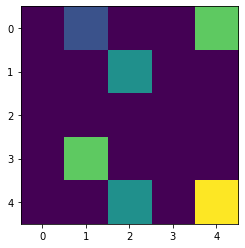

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.01062795 -0.00608938 -0.03253554 -0.00194363]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




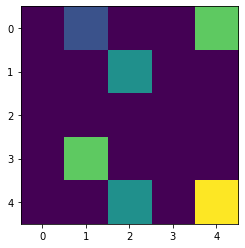

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00194363]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00194363]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




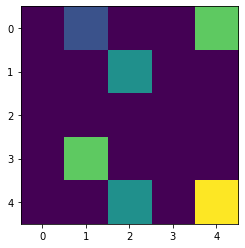

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00141265 -0.00608938 -0.03253554 -0.00044864]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




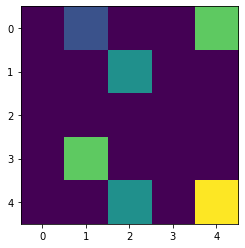

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00324    -0.00599766 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.03253554 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.03253554 -0.00044864]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




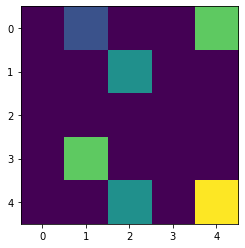

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00324    -0.00599766 -0.00608938 -0.00910995 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00910995 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00910995 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00910995 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00910995 -0.00044864]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




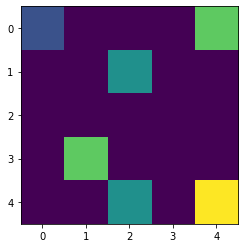

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00044864]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00044864]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




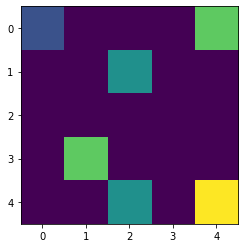

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00324    -0.00599766 -0.00608938 -0.00099175 -0.00012562]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




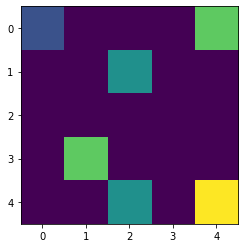

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.3333333333333333, Average(last 10): 0.0


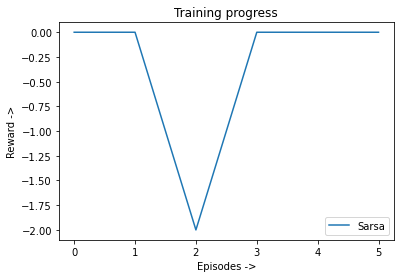

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00012562]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00012562]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




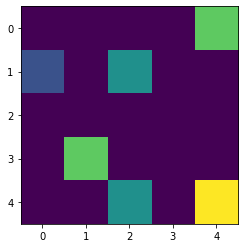

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00099175 -0.00019108]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




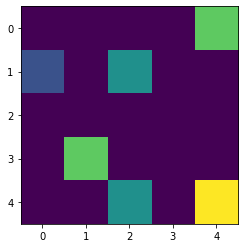

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00034661 -0.00599766 -0.00608938 -0.00013357 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00013357 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00013357 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00013357 -0.00019108]
 [-0.00034661 -0.00599766 -0.00608938 -0.00013357 -0.00019108]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




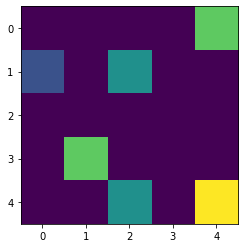

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.33568845e-04
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.33568845e-04
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.33568845e-04
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.33568845e-04
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.33568845e-04
  -4.31500820e-05]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




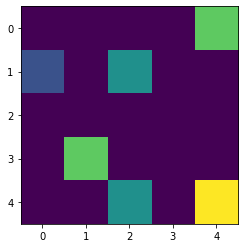

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -4.31500820e-05]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -4.31500820e-05]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




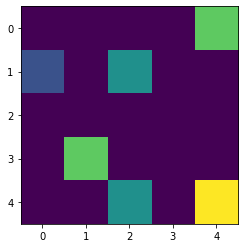

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -2.11238993e-05
  -8.11731007e-06]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




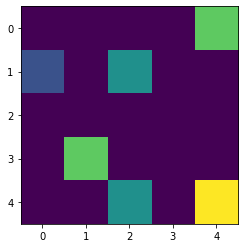

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -5.99766117e-03 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




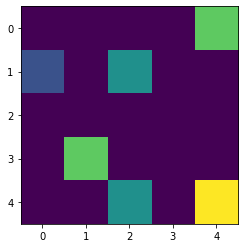

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-3.46611409e-04 -6.01227233e-04 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -6.01227233e-04 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -6.01227233e-04 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -6.01227233e-04 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]
 [-3.46611409e-04 -6.01227233e-04 -6.08938157e-03 -1.08169140e-03
  -8.11731007e-06]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




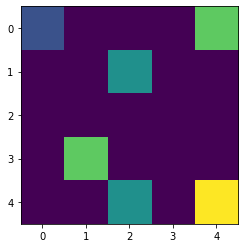

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00034661 -0.00060123 -0.00608938 -0.00108169 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00108169 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00108169 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00108169 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00108169 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




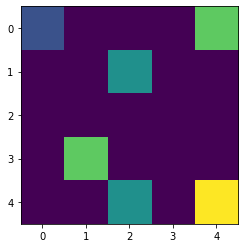

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-0.00034661 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00034661 -0.00060123 -0.00608938 -0.00014336 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




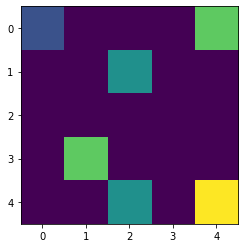

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.2857142857142857, Average(last 10): 0.0


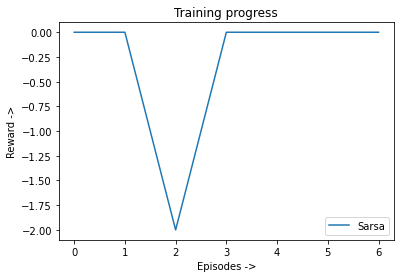

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.00113075 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00608938 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00608938 -0.00014336 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




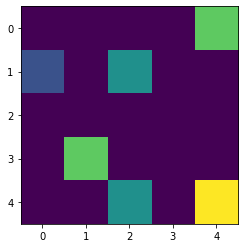

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00113075 -0.00060123 -0.00063474 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00014336 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00014336 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




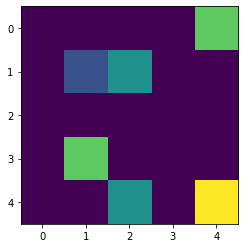

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-0.00113075 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00113075 -0.00060123 -0.00063474 -0.00021787 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




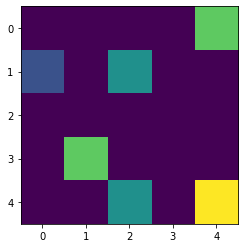

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-0.00015229 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00021787 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00021787 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




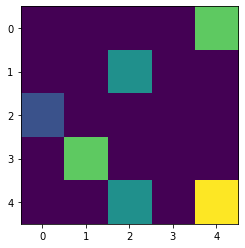

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.52291794e-04 -6.01227233e-04 -6.34743326e-04 -6.10039286e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -6.34743326e-04 -6.10039286e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -6.34743326e-04 -6.10039286e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -6.34743326e-04 -6.10039286e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -6.34743326e-04 -6.10039286e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




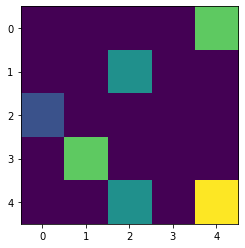

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-0.00015229 -0.00060123 -0.00063474 -0.00012035 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00012035 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00012035 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00012035 -0.00019552]
 [-0.00015229 -0.00060123 -0.00063474 -0.00012035 -0.00019552]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




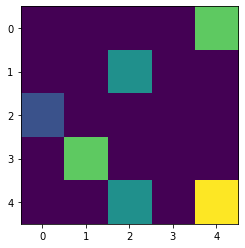

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -1.20354192e-04
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -1.20354192e-04
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -1.20354192e-04
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -1.20354192e-04
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -1.20354192e-04
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




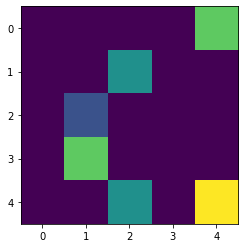

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -8.51380871e-05 -2.73602748e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




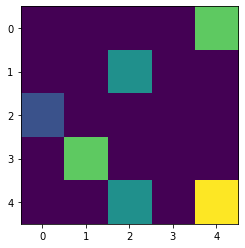

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-1.52291794e-04 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.52291794e-04 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




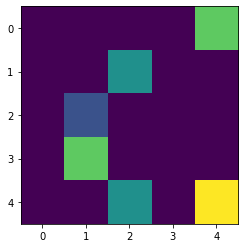

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.01227233e-04 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : down




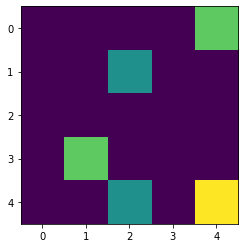

<IPython.core.display.Javascript object>

The total reward for the episode is :-2
Evaluation score is :-0.2

After 10, average score: -0.5, Average(last 10): 0.0


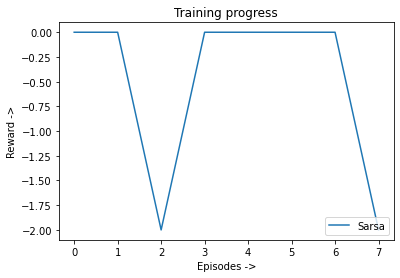

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.73602748e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




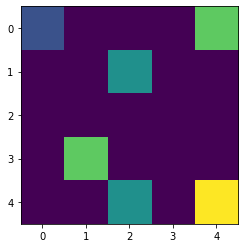

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -7.66087696e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -7.66087696e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -7.66087696e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -7.66087696e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -7.66087696e-06
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




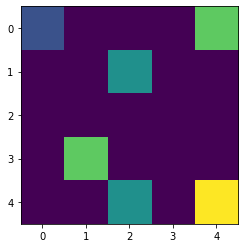

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.14504555e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.14504555e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.14504555e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.14504555e-06
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -2.14504555e-06
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




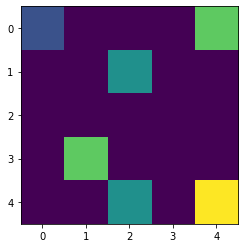

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -6.00612753e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -6.00612753e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -6.00612753e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -6.00612753e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -6.00612753e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




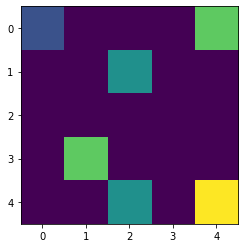

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.68171571e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.68171571e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.68171571e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.68171571e-07
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.68171571e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




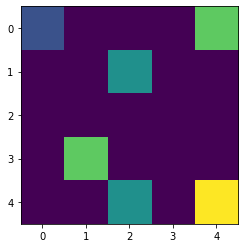

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -4.70880399e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -4.70880399e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -4.70880399e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -4.70880399e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -4.70880399e-08
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




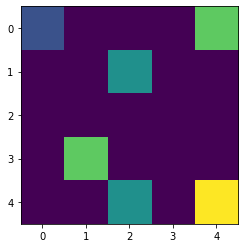

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.31846512e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.31846512e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.31846512e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.31846512e-08
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.31846512e-08
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




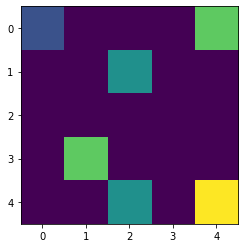

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -6.50475727e-05 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




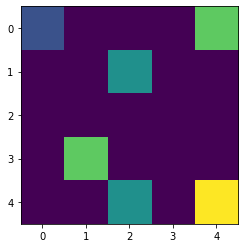

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.17098816e-05
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




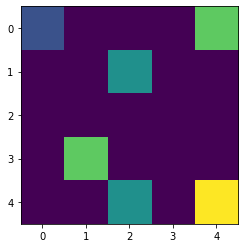

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.72124463e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.72124463e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.72124463e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.72124463e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.72124463e-06
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




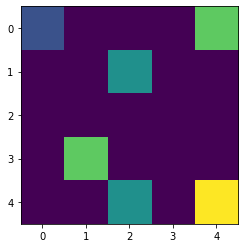

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.4444444444444444, Average(last 10): 0.0


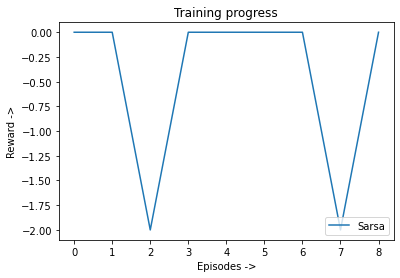

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -7.61948496e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -7.61948496e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -7.61948496e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -7.61948496e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -7.61948496e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




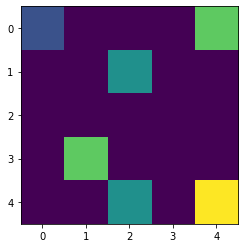

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.13345579e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.13345579e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.13345579e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.13345579e-07
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -2.13345579e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




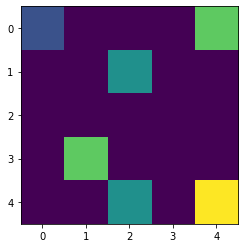

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -5.97367621e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -5.97367621e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -5.97367621e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -5.97367621e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -5.97367621e-08
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




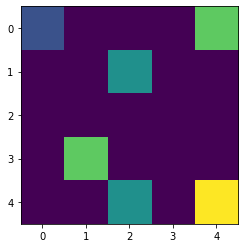

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.67262934e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.67262934e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.67262934e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.67262934e-08
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.67262934e-08
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




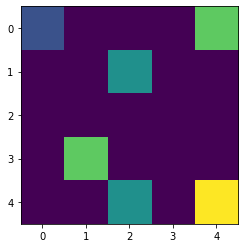

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -8.61253595e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




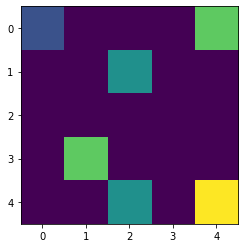

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -1.55192910e-06
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




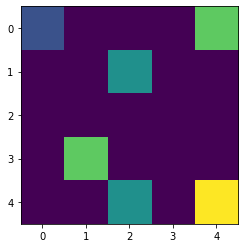

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -1.14060083e-06 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




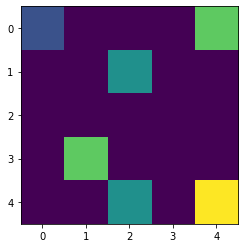

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-1.80002015e+00 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002015e+00 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




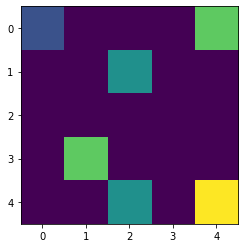

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.60501060e-07
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




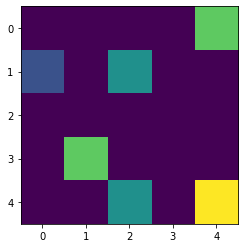

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.24004105e-02
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.24004105e-02
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.24004105e-02
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.24004105e-02
  -1.95516183e-04]
 [-1.80002080e-01 -3.24003742e-01 -3.59263315e-05 -3.24004105e-02
  -1.95516183e-04]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




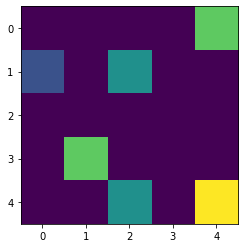

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.4, Average(last 10): 0.0


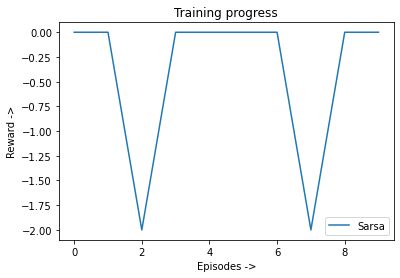

No handles with labels found to put in legend.


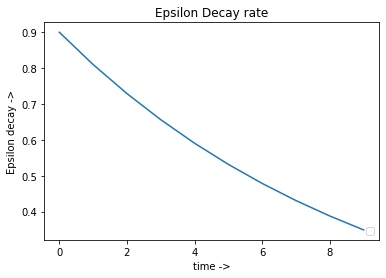

In [ ]:
#Tuning hyper parameters
# changing gamma(discount factor to 0.2)
epsilon = 1
eps_decay_factor = 0.9
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.2
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)


*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




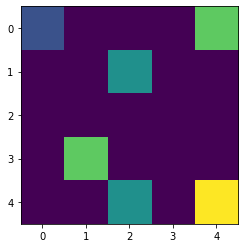

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




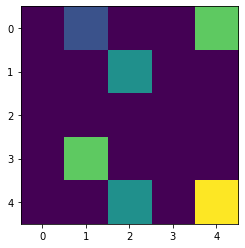

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




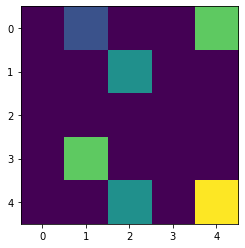

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




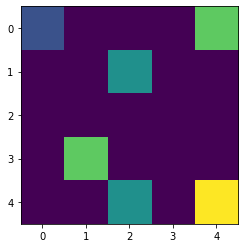

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




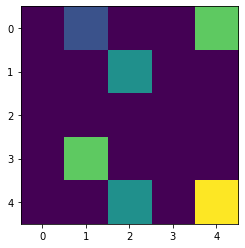

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




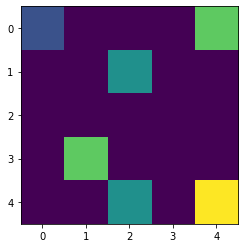

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




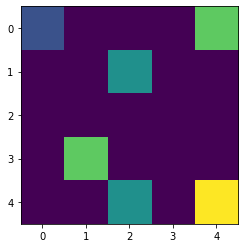

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




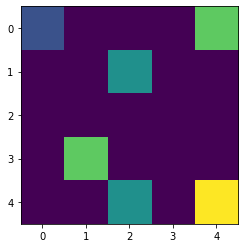

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




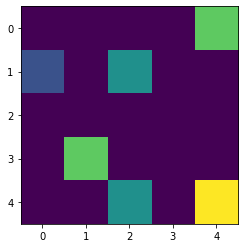

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




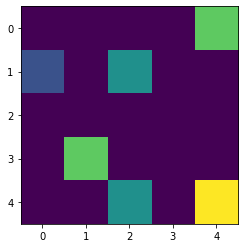

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.9
After 10, average score: 0.0, Average(last 10): 0.0


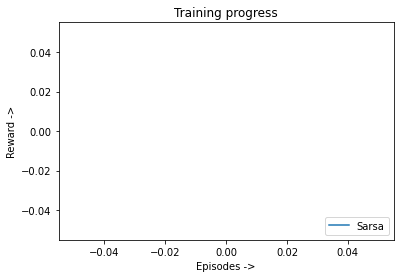

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




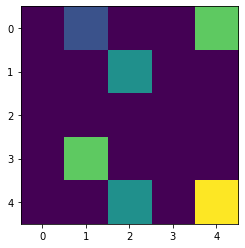

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : down




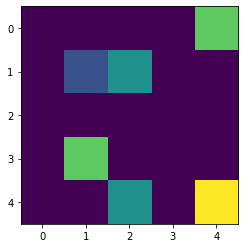

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : down




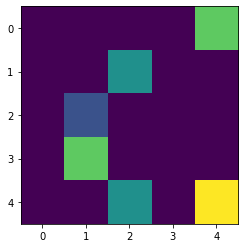

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : up




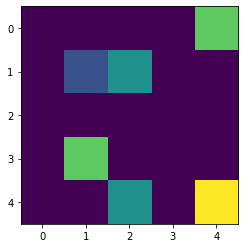

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




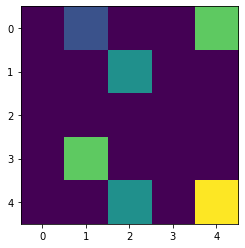

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




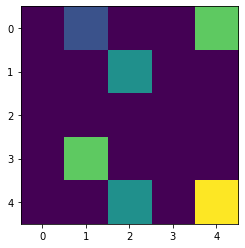

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




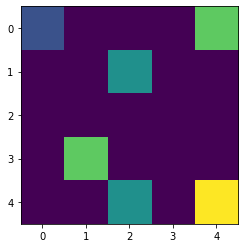

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




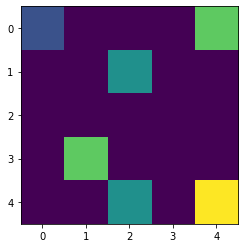

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




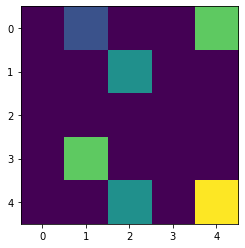

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




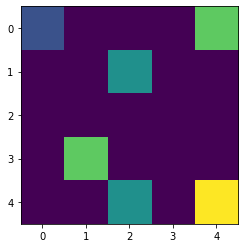

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


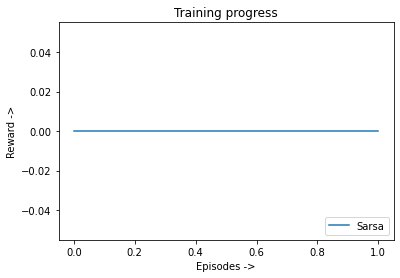

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




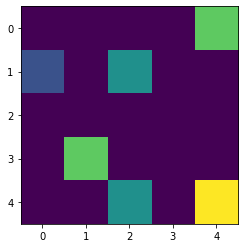

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




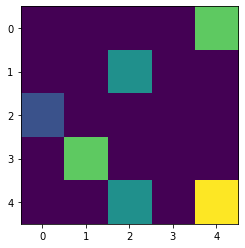

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




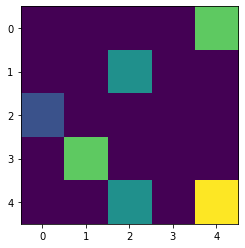

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




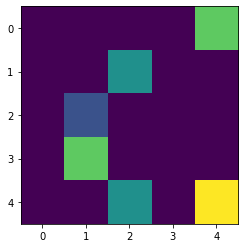

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




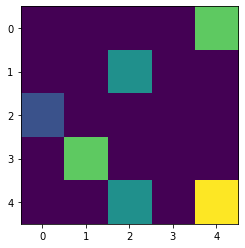

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




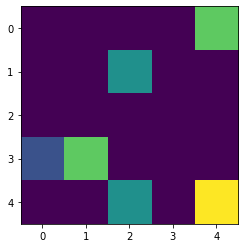

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




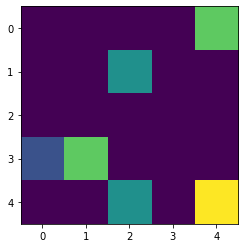

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




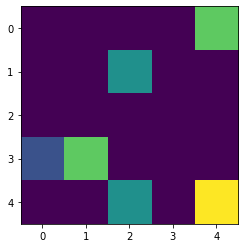

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




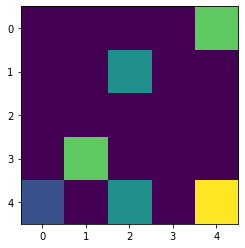

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




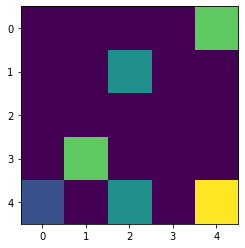

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


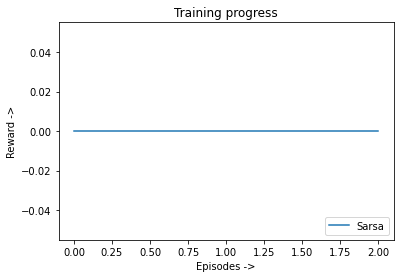

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




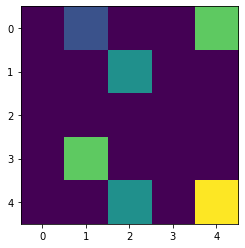

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




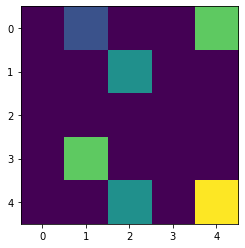

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




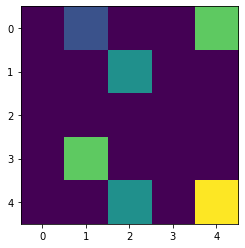

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




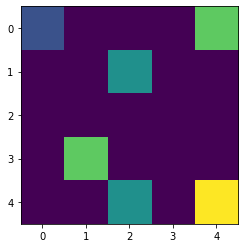

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




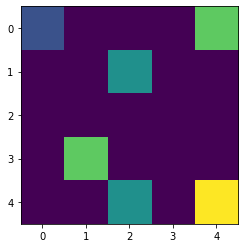

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




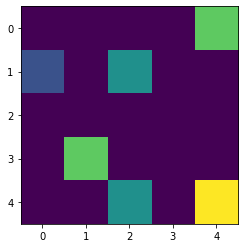

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




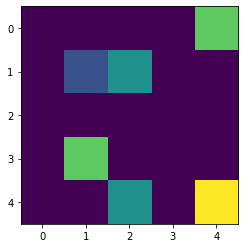

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : down




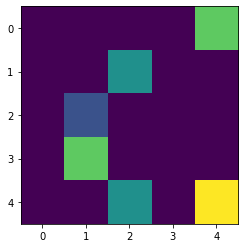

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 1 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 2]
The action chosen is : right




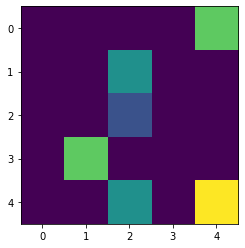

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 1 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 1 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 3]
The action chosen is : right




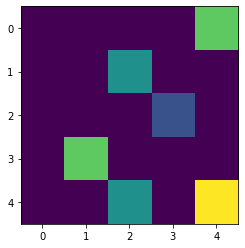

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


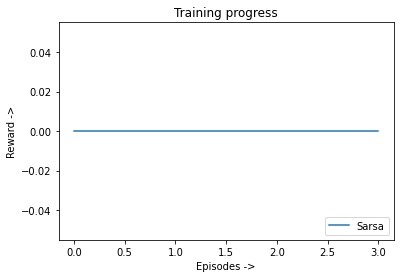

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




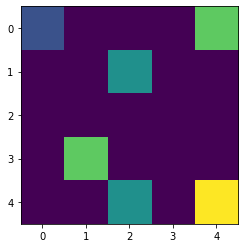

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




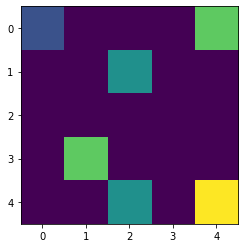

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




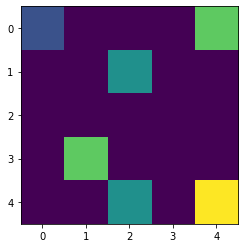

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




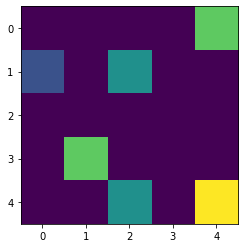

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




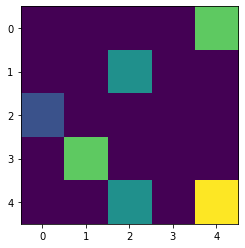

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




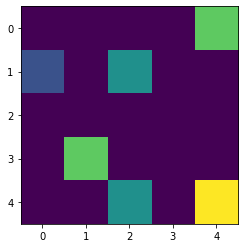

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




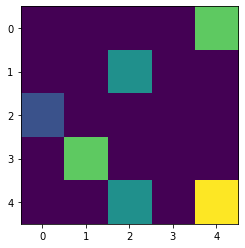

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




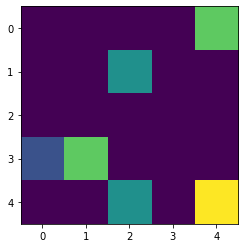

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




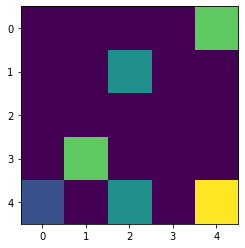

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




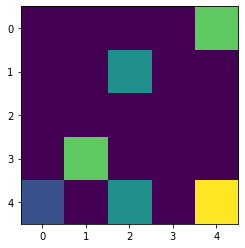

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


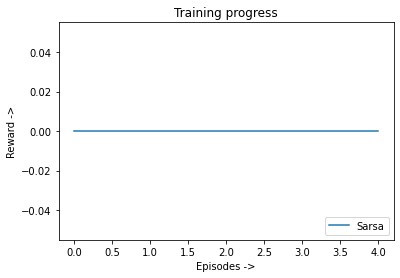

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




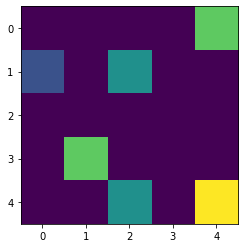

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




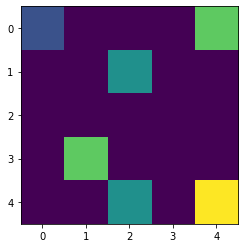

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




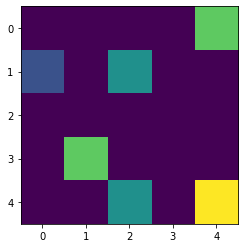

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




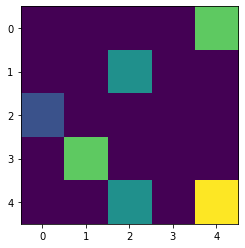

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




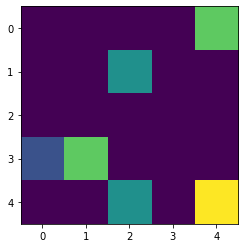

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




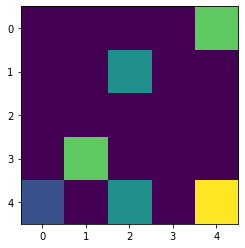

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




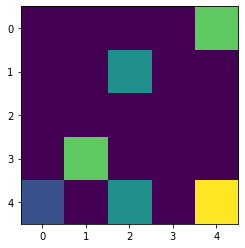

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




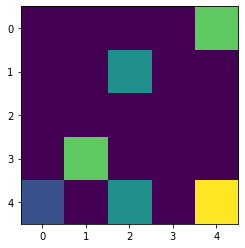

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




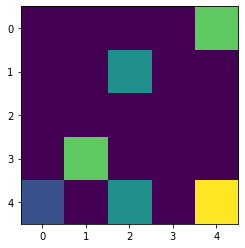

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




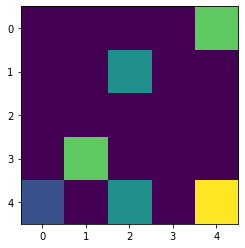

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


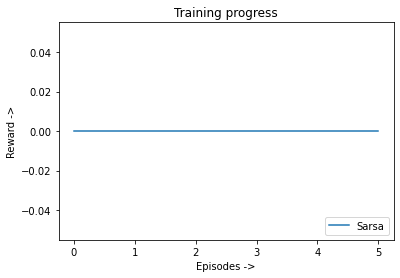

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




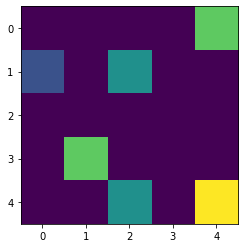

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




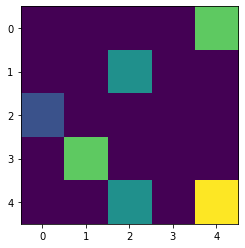

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




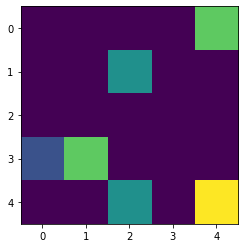

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




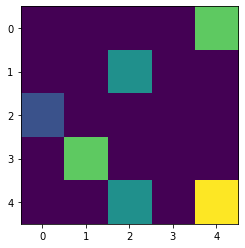

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




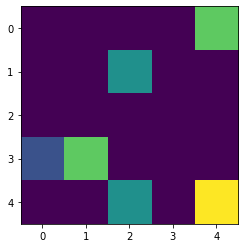

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




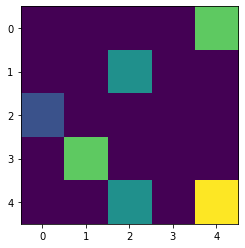

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




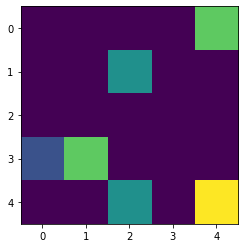

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




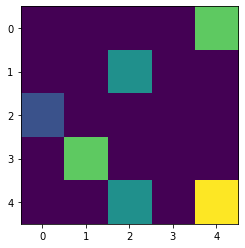

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




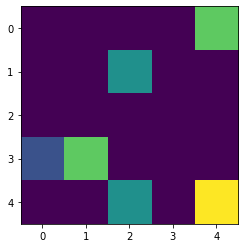

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




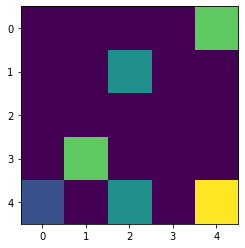

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


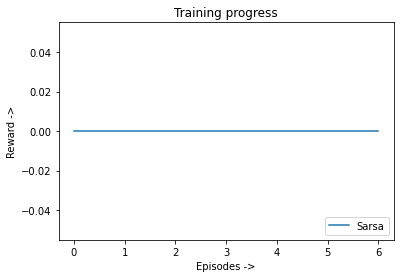

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




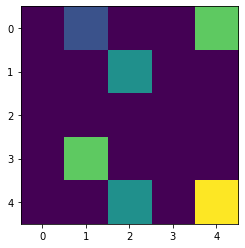

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : down




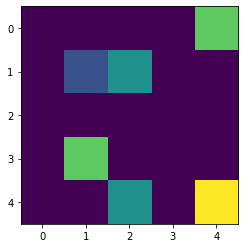

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




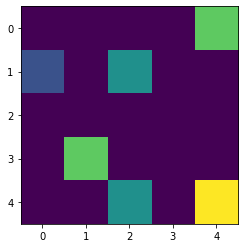

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




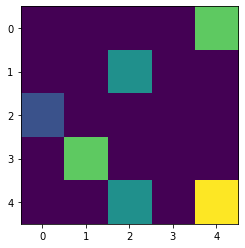

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




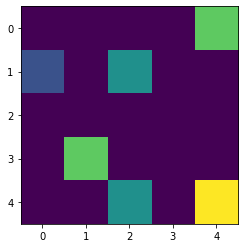

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




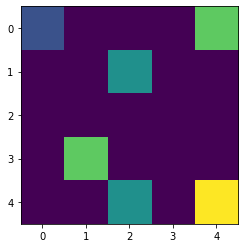

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




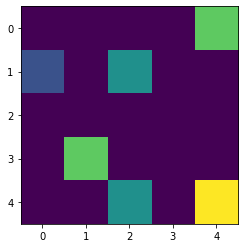

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




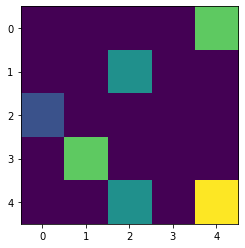

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




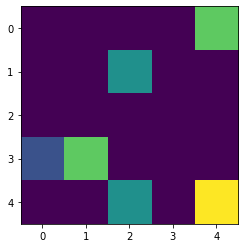

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




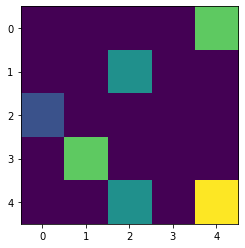

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


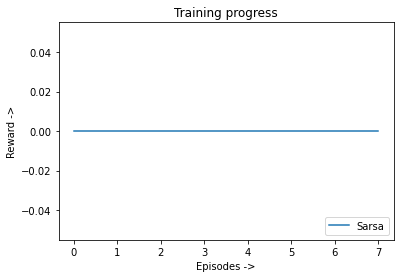

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




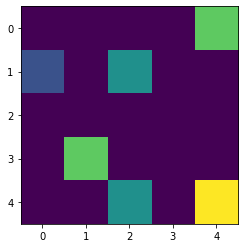

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




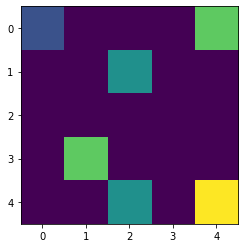

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




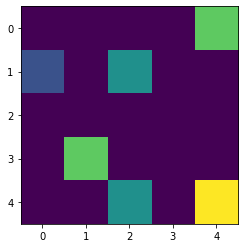

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




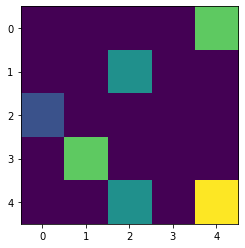

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




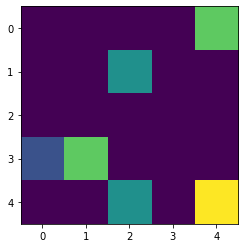

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




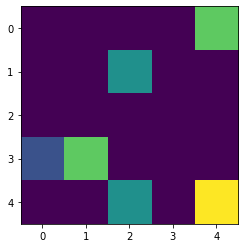

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




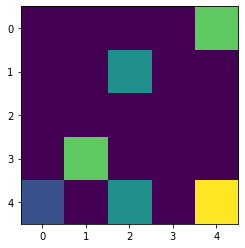

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




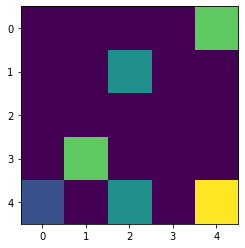

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




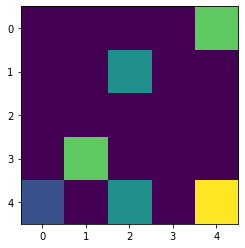

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




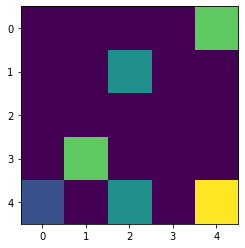

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


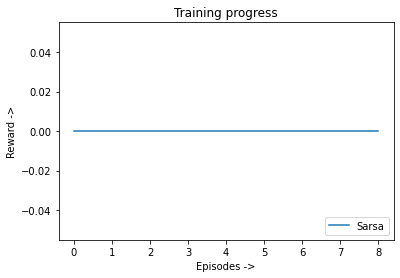

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




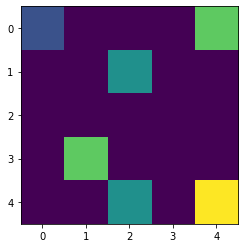

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




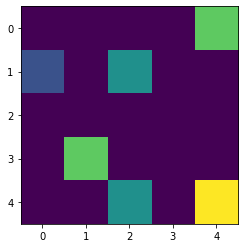

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




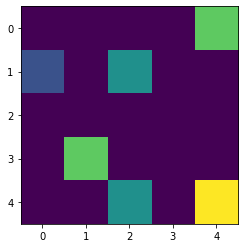

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




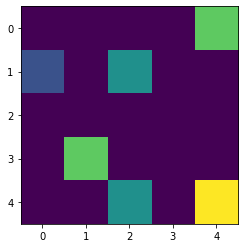

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




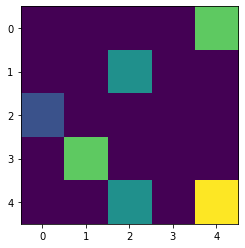

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




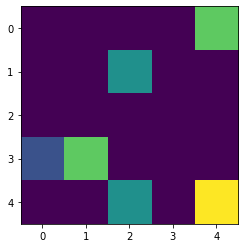

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




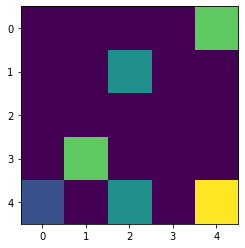

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




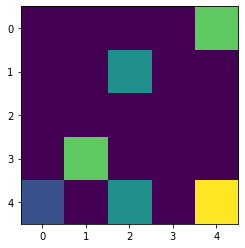

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




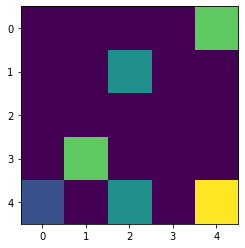

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




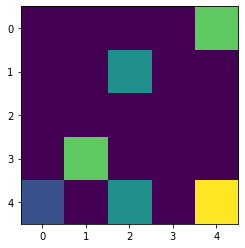

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


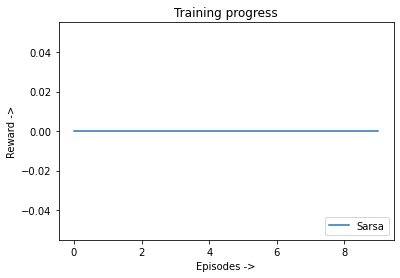

No handles with labels found to put in legend.


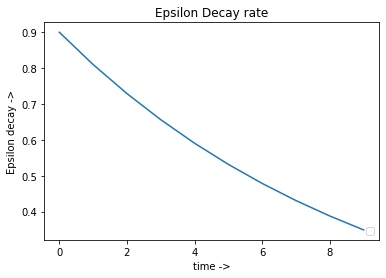

In [ ]:
#gamma = 0.5
epsilon = 1
eps_decay_factor = 0.9
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.5
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)

*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




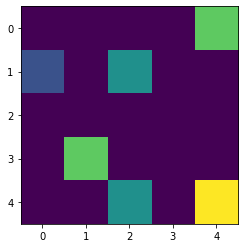

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




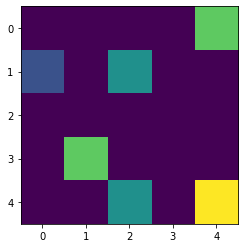

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




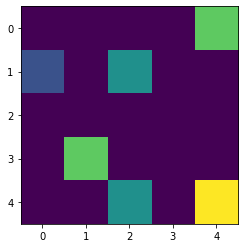

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




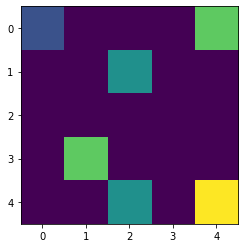

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




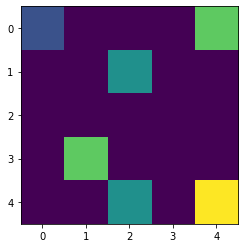

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




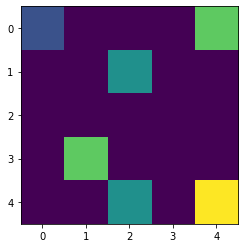

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




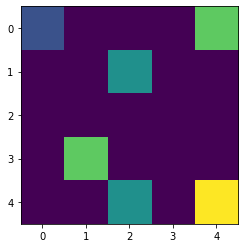

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




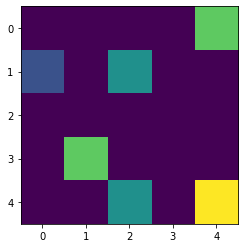

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




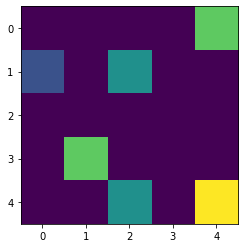

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




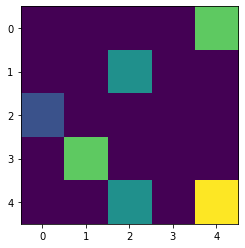

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.9
After 10, average score: 0.0, Average(last 10): 0.0


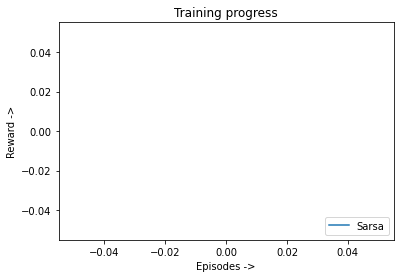

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




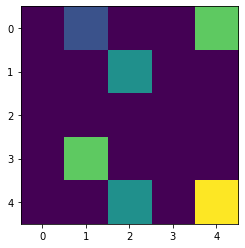

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




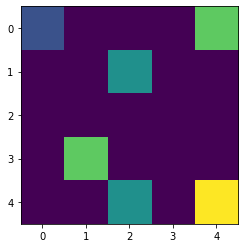

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




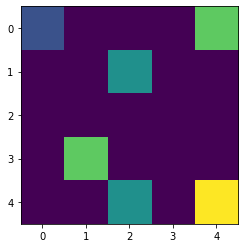

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




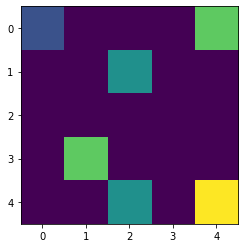

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




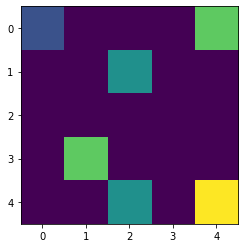

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




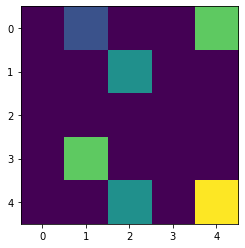

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : right




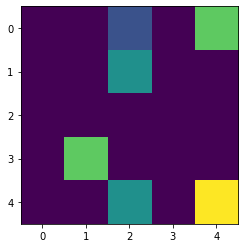

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 5
The agent current position is : [1 2]
The action chosen is : down




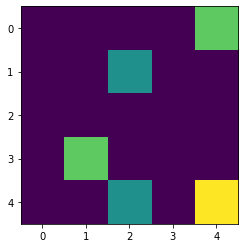

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]
 [4.5 0.  0.  0.  0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : right




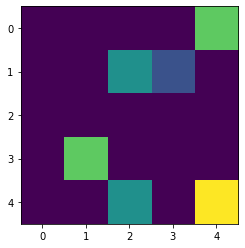

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[4.5      4.049595 0.       0.       0.      ]
 [4.5      4.049595 0.       0.       0.      ]
 [4.5      4.049595 0.       0.       0.      ]
 [4.5      4.049595 0.       0.       0.      ]
 [4.5      4.049595 0.       0.       0.      ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 3]
The action chosen is : up




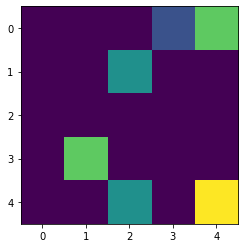

<IPython.core.display.Javascript object>

The total reward for the episode is :5
Evaluation score is :0.5
Episode: 1/10, score: 5, Average(last 10): 0.0, epsilon: 0.81
After 10, average score: 2.5, Average(last 10): 0.0


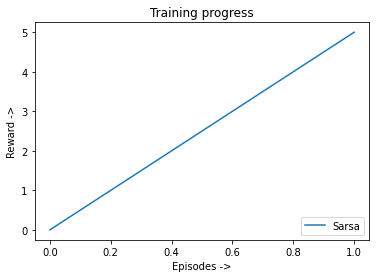

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0.45     4.049595 0.       0.       0.      ]
 [0.45     4.049595 0.       0.       0.      ]
 [0.45     4.049595 0.       0.       0.      ]
 [0.45     4.049595 0.       0.       0.      ]
 [0.45     4.049595 0.       0.       0.      ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




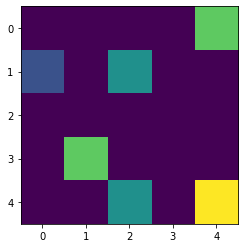

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0.45       4.049595   0.         3.64427104 0.        ]
 [0.45       4.049595   0.         3.64427104 0.        ]
 [0.45       4.049595   0.         3.64427104 0.        ]
 [0.45       4.049595   0.         3.64427104 0.        ]
 [0.45       4.049595   0.         3.64427104 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




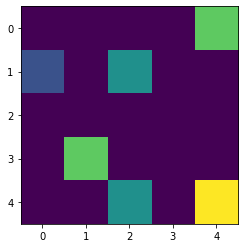

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0.45       3.68447545 0.         3.64427104 0.        ]
 [0.45       3.68447545 0.         3.64427104 0.        ]
 [0.45       3.68447545 0.         3.64427104 0.        ]
 [0.45       3.68447545 0.         3.64427104 0.        ]
 [0.45       3.68447545 0.         3.64427104 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




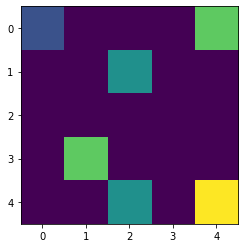

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0.45       3.68447545 0.         0.3644271  0.        ]
 [0.45       3.68447545 0.         0.3644271  0.        ]
 [0.45       3.68447545 0.         0.3644271  0.        ]
 [0.45       3.68447545 0.         0.3644271  0.        ]
 [0.45       3.68447545 0.         0.3644271  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




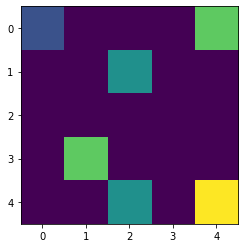

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0.45       3.68447545 3.3156963  0.3644271  0.        ]
 [0.45       3.68447545 3.3156963  0.3644271  0.        ]
 [0.45       3.68447545 3.3156963  0.3644271  0.        ]
 [0.45       3.68447545 3.3156963  0.3644271  0.        ]
 [0.45       3.68447545 3.3156963  0.3644271  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




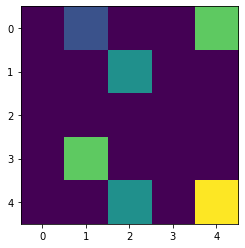

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0.45       3.68414385 3.3156963  0.3644271  0.        ]
 [0.45       3.68414385 3.3156963  0.3644271  0.        ]
 [0.45       3.68414385 3.3156963  0.3644271  0.        ]
 [0.45       3.68414385 3.3156963  0.3644271  0.        ]
 [0.45       3.68414385 3.3156963  0.3644271  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




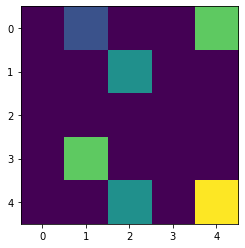

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0.45       0.69636598 3.3156963  0.3644271  0.        ]
 [0.45       0.69636598 3.3156963  0.3644271  0.        ]
 [0.45       0.69636598 3.3156963  0.3644271  0.        ]
 [0.45       0.69636598 3.3156963  0.3644271  0.        ]
 [0.45       0.69636598 3.3156963  0.3644271  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




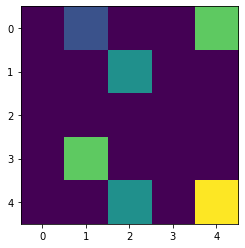

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0.45       0.69636598 3.3156963  0.66310942 0.        ]
 [0.45       0.69636598 3.3156963  0.66310942 0.        ]
 [0.45       0.69636598 3.3156963  0.66310942 0.        ]
 [0.45       0.69636598 3.3156963  0.66310942 0.        ]
 [0.45       0.69636598 3.3156963  0.66310942 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




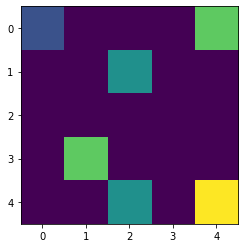

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0.45       0.4745961  3.3156963  0.66310942 0.        ]
 [0.45       0.4745961  3.3156963  0.66310942 0.        ]
 [0.45       0.4745961  3.3156963  0.66310942 0.        ]
 [0.45       0.4745961  3.3156963  0.66310942 0.        ]
 [0.45       0.4745961  3.3156963  0.66310942 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




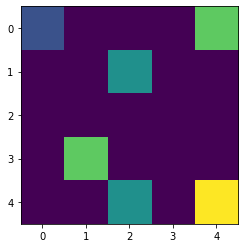

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[3.02882826 0.4745961  3.3156963  0.66310942 0.        ]
 [3.02882826 0.4745961  3.3156963  0.66310942 0.        ]
 [3.02882826 0.4745961  3.3156963  0.66310942 0.        ]
 [3.02882826 0.4745961  3.3156963  0.66310942 0.        ]
 [3.02882826 0.4745961  3.3156963  0.66310942 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




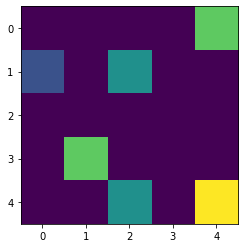

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.6666666666666667, Average(last 10): 0.0


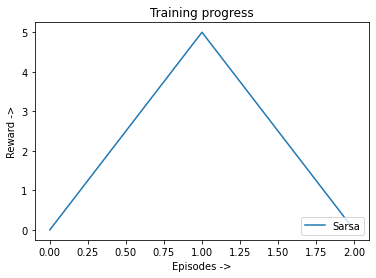

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[3.28671108 0.4745961  3.3156963  0.66310942 0.        ]
 [3.28671108 0.4745961  3.3156963  0.66310942 0.        ]
 [3.28671108 0.4745961  3.3156963  0.66310942 0.        ]
 [3.28671108 0.4745961  3.3156963  0.66310942 0.        ]
 [3.28671108 0.4745961  3.3156963  0.66310942 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




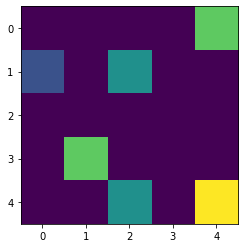

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[3.28671108 0.4745961  0.92830843 0.66310942 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66310942 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66310942 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66310942 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66310942 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




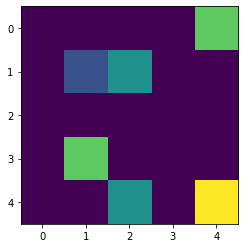

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[3.28671108 0.4745961  0.92830843 0.66304974 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66304974 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66304974 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66304974 0.        ]
 [3.28671108 0.4745961  0.92830843 0.66304974 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




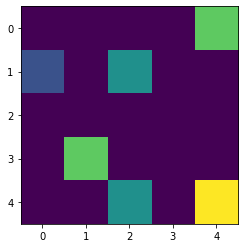

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[3.28671108 0.4745961  0.92830843 3.02404915 0.        ]
 [3.28671108 0.4745961  0.92830843 3.02404915 0.        ]
 [3.28671108 0.4745961  0.92830843 3.02404915 0.        ]
 [3.28671108 0.4745961  0.92830843 3.02404915 0.        ]
 [3.28671108 0.4745961  0.92830843 3.02404915 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




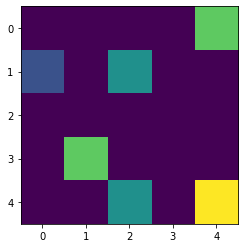

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.16406515 0.4745961  0.92830843 3.02404915 0.        ]
 [1.16406515 0.4745961  0.92830843 3.02404915 0.        ]
 [1.16406515 0.4745961  0.92830843 3.02404915 0.        ]
 [1.16406515 0.4745961  0.92830843 3.02404915 0.        ]
 [1.16406515 0.4745961  0.92830843 3.02404915 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




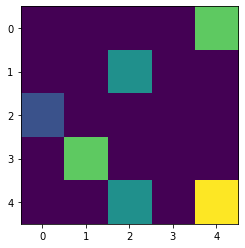

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.16406515 0.4745961  0.51992462 3.02404915 0.        ]
 [1.16406515 0.4745961  0.51992462 3.02404915 0.        ]
 [1.16406515 0.4745961  0.51992462 3.02404915 0.        ]
 [1.16406515 0.4745961  0.51992462 3.02404915 0.        ]
 [1.16406515 0.4745961  0.51992462 3.02404915 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : right




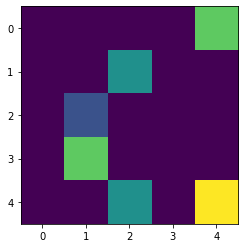

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.16406515 2.76883168 0.51992462 3.02404915 0.        ]
 [1.16406515 2.76883168 0.51992462 3.02404915 0.        ]
 [1.16406515 2.76883168 0.51992462 3.02404915 0.        ]
 [1.16406515 2.76883168 0.51992462 3.02404915 0.        ]
 [1.16406515 2.76883168 0.51992462 3.02404915 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : up




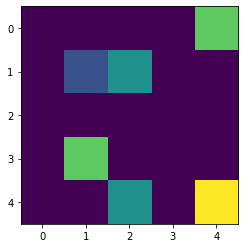

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.16406515 2.76883168 0.51992462 0.77029028 0.        ]
 [1.16406515 2.76883168 0.51992462 0.77029028 0.        ]
 [1.16406515 2.76883168 0.51992462 0.77029028 0.        ]
 [1.16406515 2.76883168 0.51992462 0.77029028 0.        ]
 [1.16406515 2.76883168 0.51992462 0.77029028 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




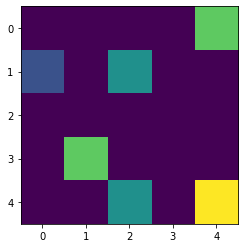

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.16406515 2.76883168 2.54369178 0.77029028 0.        ]
 [1.16406515 2.76883168 2.54369178 0.77029028 0.        ]
 [1.16406515 2.76883168 2.54369178 0.77029028 0.        ]
 [1.16406515 2.76883168 2.54369178 0.77029028 0.        ]
 [1.16406515 2.76883168 2.54369178 0.77029028 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




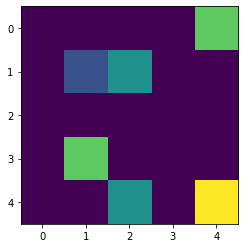

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.16406515 0.97007509 2.54369178 0.77029028 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77029028 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77029028 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77029028 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77029028 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




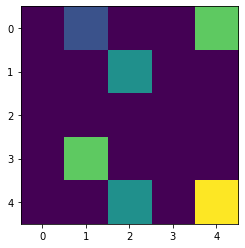

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.25, Average(last 10): 0.0


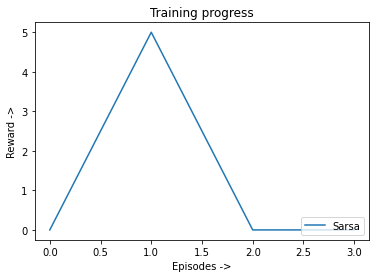

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.16406515 0.97007509 2.54369178 0.77022095 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77022095 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77022095 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77022095 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77022095 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




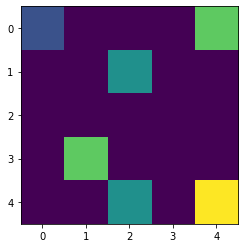

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.16406515 0.97007509 2.54369178 0.77015163 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77015163 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77015163 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77015163 0.        ]
 [1.16406515 0.97007509 2.54369178 0.77015163 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




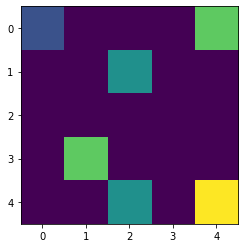

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.16406515 0.97007509 2.54369178 2.36610883 0.        ]
 [1.16406515 0.97007509 2.54369178 2.36610883 0.        ]
 [1.16406515 0.97007509 2.54369178 2.36610883 0.        ]
 [1.16406515 0.97007509 2.54369178 2.36610883 0.        ]
 [1.16406515 0.97007509 2.54369178 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




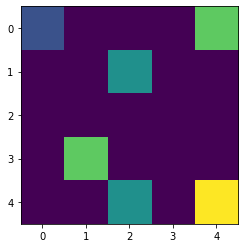

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.16406515 0.97007509 1.12734945 2.36610883 0.        ]
 [1.16406515 0.97007509 1.12734945 2.36610883 0.        ]
 [1.16406515 0.97007509 1.12734945 2.36610883 0.        ]
 [1.16406515 0.97007509 1.12734945 2.36610883 0.        ]
 [1.16406515 0.97007509 1.12734945 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




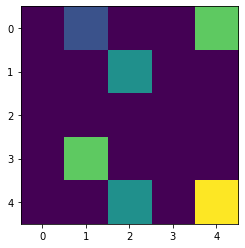

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.16406515 0.96998778 1.12734945 2.36610883 0.        ]
 [1.16406515 0.96998778 1.12734945 2.36610883 0.        ]
 [1.16406515 0.96998778 1.12734945 2.36610883 0.        ]
 [1.16406515 0.96998778 1.12734945 2.36610883 0.        ]
 [1.16406515 0.96998778 1.12734945 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




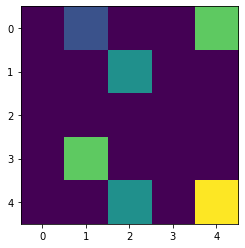

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.16406515 1.11151182 1.12734945 2.36610883 0.        ]
 [1.16406515 1.11151182 1.12734945 2.36610883 0.        ]
 [1.16406515 1.11151182 1.12734945 2.36610883 0.        ]
 [1.16406515 1.11151182 1.12734945 2.36610883 0.        ]
 [1.16406515 1.11151182 1.12734945 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : up




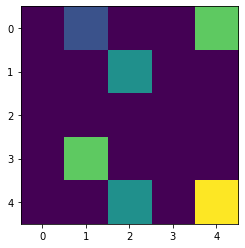

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.16406515 1.11151182 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11151182 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11151182 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11151182 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11151182 1.11299555 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : right




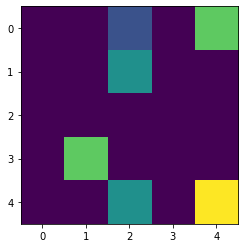

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.16406515 1.11274701 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11274701 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11274701 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11274701 1.11299555 2.36610883 0.        ]
 [1.16406515 1.11274701 1.11299555 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : up




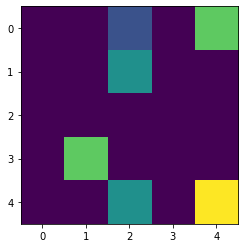

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[1.16406515 1.11274701 1.15885342 2.36610883 0.        ]
 [1.16406515 1.11274701 1.15885342 2.36610883 0.        ]
 [1.16406515 1.11274701 1.15885342 2.36610883 0.        ]
 [1.16406515 1.11274701 1.15885342 2.36610883 0.        ]
 [1.16406515 1.11274701 1.15885342 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 3]
The action chosen is : right




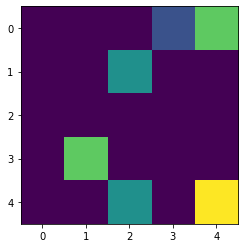

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.1592703  1.11274701 1.15885342 2.36610883 0.        ]
 [1.1592703  1.11274701 1.15885342 2.36610883 0.        ]
 [1.1592703  1.11274701 1.15885342 2.36610883 0.        ]
 [1.1592703  1.11274701 1.15885342 2.36610883 0.        ]
 [1.1592703  1.11274701 1.15885342 2.36610883 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : down




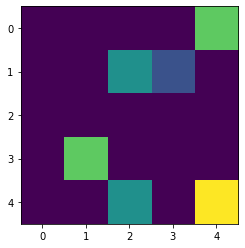

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.0, Average(last 10): 0.0


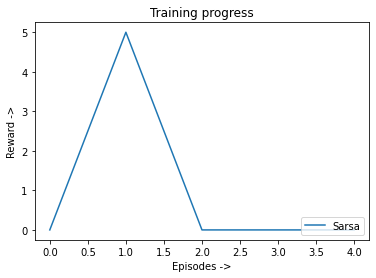

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[1.1592703  1.11274701 1.15885342 1.27984981 0.        ]
 [1.1592703  1.11274701 1.15885342 1.27984981 0.        ]
 [1.1592703  1.11274701 1.15885342 1.27984981 0.        ]
 [1.1592703  1.11274701 1.15885342 1.27984981 0.        ]
 [1.1592703  1.11274701 1.15885342 1.27984981 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




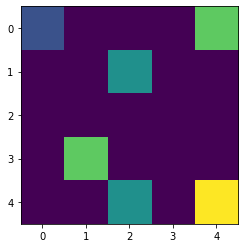

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.11729919 1.11274701 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11274701 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11274701 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11274701 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11274701 1.15885342 1.27984981 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




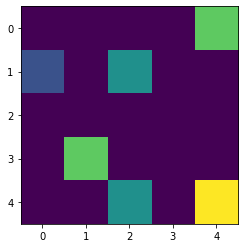

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[1.11729919 1.11674341 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11674341 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11674341 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11674341 1.15885342 1.27984981 0.        ]
 [1.11729919 1.11674341 1.15885342 1.27984981 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




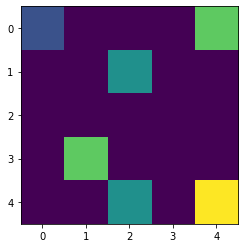

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.26347957 1.11674341 1.15885342 1.27984981 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27984981 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27984981 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27984981 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27984981 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




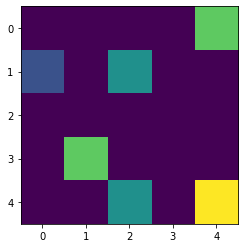

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.26347957 1.11674341 1.15885342 1.27973463 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27973463 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27973463 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27973463 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27973463 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




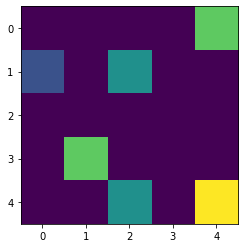

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.26347957 1.11674341 1.15885342 1.27961945 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27961945 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27961945 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27961945 0.        ]
 [1.26347957 1.11674341 1.15885342 1.27961945 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




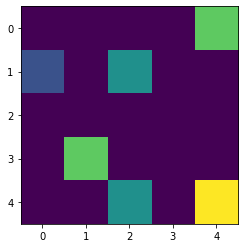

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.26347957 1.11674341 1.15885342 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15885342 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15885342 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15885342 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15885342 1.17082573 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : left




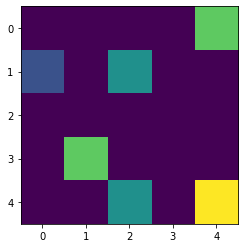

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.26347957 1.11674341 1.15874912 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15874912 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15874912 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15874912 1.17082573 0.        ]
 [1.26347957 1.11674341 1.15874912 1.17082573 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




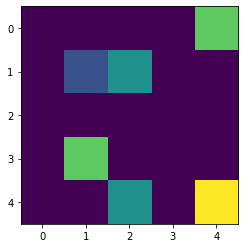

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[1.26347957 1.11674341 5.75289281 1.17082573 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17082573 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17082573 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17082573 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17082573 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 5
The agent current position is : [1 2]
The action chosen is : right




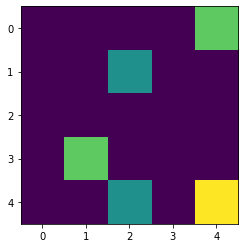

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 1 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[5.30343372 1.11674341 5.75289281 1.17082573 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17082573 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17082573 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17082573 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17082573 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 2]
The action chosen is : down




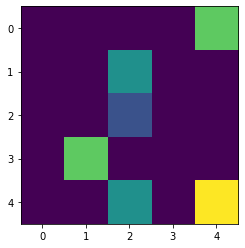

<IPython.core.display.Javascript object>

The total reward for the episode is :5
Evaluation score is :0.5

After 10, average score: 1.6666666666666667, Average(last 10): 0.0


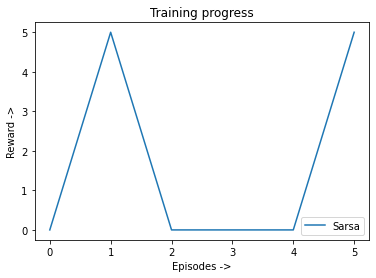

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[5.30343372 1.11674341 5.75289281 1.17072035 0.        ]
 [1.26347957 1.11674341 5.75289281 1.17072035 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17072035 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17072035 0.        ]
 [5.30343372 1.11674341 5.75289281 1.17072035 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




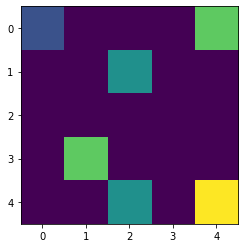

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[5.30343372 1.11674341 5.75289281 5.2941578  0.        ]
 [1.26347957 1.11674341 5.75289281 5.2941578  0.        ]
 [5.30343372 1.11674341 5.75289281 5.2941578  0.        ]
 [5.30343372 1.11674341 5.75289281 5.2941578  0.        ]
 [5.30343372 1.11674341 5.75289281 5.2941578  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




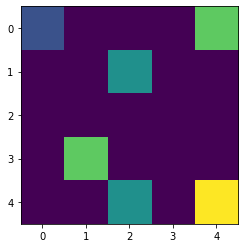

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[5.30343372 1.11674341 5.33955483 5.2941578  0.        ]
 [1.26347957 1.11674341 5.33955483 5.2941578  0.        ]
 [5.30343372 1.11674341 5.33955483 5.2941578  0.        ]
 [5.30343372 1.11674341 5.33955483 5.2941578  0.        ]
 [5.30343372 1.11674341 5.33955483 5.2941578  0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




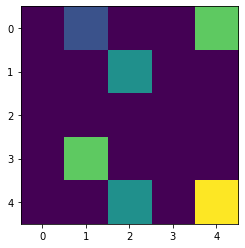

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.30343372 1.11674341 5.33955483 1.53438435 0.        ]
 [1.26347957 1.11674341 5.33955483 1.53438435 0.        ]
 [5.30343372 1.11674341 5.33955483 1.53438435 0.        ]
 [5.30343372 1.11674341 5.33955483 1.53438435 0.        ]
 [5.30343372 1.11674341 5.33955483 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




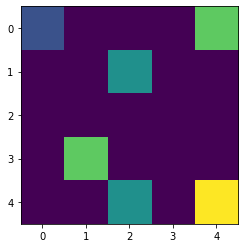

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[5.30343372 4.91679313 5.33955483 1.53438435 0.        ]
 [1.26347957 4.91679313 5.33955483 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33955483 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33955483 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33955483 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




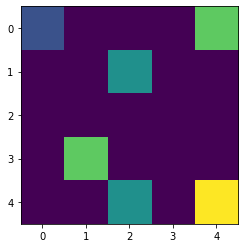

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[5.30343372 4.91679313 5.33907427 1.53438435 0.        ]
 [1.26347957 4.91679313 5.33907427 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33907427 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33907427 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33907427 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




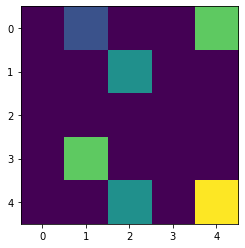

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[5.30343372 4.91679313 5.33859375 1.53438435 0.        ]
 [1.26347957 4.91679313 5.33859375 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33859375 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33859375 1.53438435 0.        ]
 [5.30343372 4.91679313 5.33859375 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 2]
The action chosen is : right




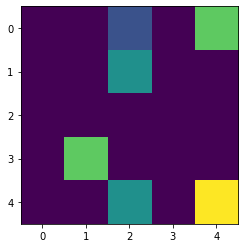

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 1 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[5.30343372 4.91679313 5.30647242 1.53438435 0.        ]
 [1.26347957 4.91679313 5.30647242 1.53438435 0.        ]
 [5.30343372 4.91679313 5.30647242 1.53438435 0.        ]
 [5.30343372 4.91679313 5.30647242 1.53438435 0.        ]
 [5.30343372 4.91679313 5.30647242 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 3]
The action chosen is : right




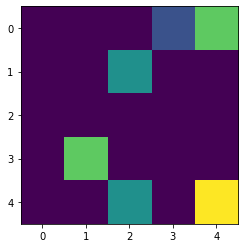

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 1 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.91115119 4.91679313 5.30647242 1.53438435 0.        ]
 [1.50715577 4.91679313 5.30647242 1.53438435 0.        ]
 [1.91115119 4.91679313 5.30647242 1.53438435 0.        ]
 [1.91115119 4.91679313 5.30647242 1.53438435 0.        ]
 [1.91115119 4.91679313 5.30647242 1.53438435 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 3]
The action chosen is : down




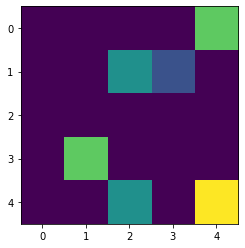

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.91115119 4.91679313 5.30647242 9.07810974 0.        ]
 [1.50715577 4.91679313 5.30647242 9.07810974 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07810974 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07810974 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07810974 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 5
The agent current position is : [1 2]
The action chosen is : left




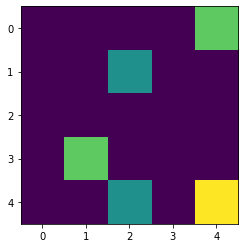

<IPython.core.display.Javascript object>

The total reward for the episode is :5
Evaluation score is :0.5

After 10, average score: 2.142857142857143, Average(last 10): 0.0


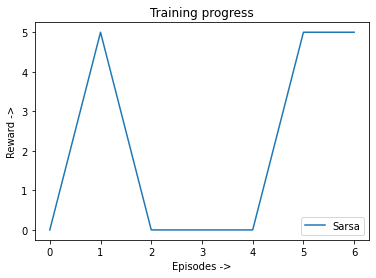

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.91115119 4.91679313 5.30647242 9.07729271 0.        ]
 [1.50715577 4.91679313 5.30647242 9.07729271 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07729271 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07729271 0.        ]
 [1.91115119 4.91679313 5.30647242 9.07729271 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




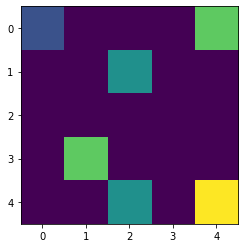

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.91115119 4.91679313 5.30647242 5.33240057 0.        ]
 [1.50715577 4.91679313 5.30647242 5.33240057 0.        ]
 [1.91115119 4.91679313 5.30647242 5.33240057 0.        ]
 [1.91115119 4.91679313 5.30647242 5.33240057 0.        ]
 [1.91115119 4.91679313 5.30647242 5.33240057 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




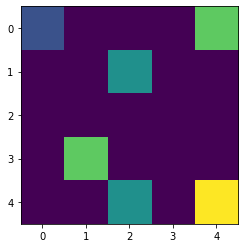

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.91115119 5.29035991 5.30647242 5.33240057 0.        ]
 [1.50715577 5.29035991 5.30647242 5.33240057 0.        ]
 [1.91115119 5.29035991 5.30647242 5.33240057 0.        ]
 [1.91115119 5.29035991 5.30647242 5.33240057 0.        ]
 [1.91115119 5.29035991 5.30647242 5.33240057 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




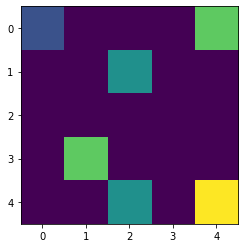

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.91115119 5.29035991 5.30647242 5.30858765 0.        ]
 [1.50715577 5.29035991 5.30647242 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30647242 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30647242 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30647242 5.30858765 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




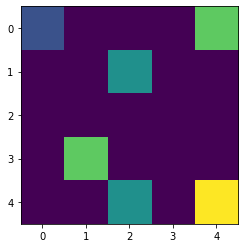

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.91115119 5.29035991 5.30789835 5.30858765 0.        ]
 [1.50715577 5.29035991 5.30789835 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30858765 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30858765 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




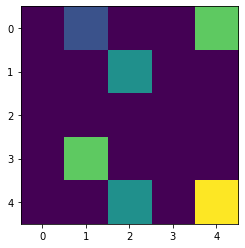

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[1.91115119 5.29035991 5.30789835 5.30810988 0.        ]
 [1.50715577 5.29035991 5.30789835 5.30810988 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30810988 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30810988 0.        ]
 [1.91115119 5.29035991 5.30789835 5.30810988 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




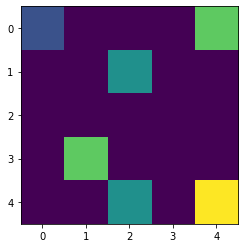

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[1.91115119 5.29035991 5.30789835 5.29165878 0.        ]
 [1.50715577 5.29035991 5.30789835 5.29165878 0.        ]
 [1.91115119 5.29035991 5.30789835 5.29165878 0.        ]
 [1.91115119 5.29035991 5.30789835 5.29165878 0.        ]
 [1.91115119 5.29035991 5.30789835 5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




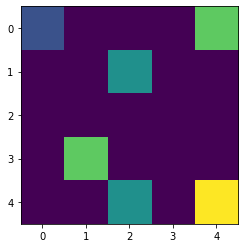

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[1.91115119 5.3056668  5.30789835 5.29165878 0.        ]
 [1.50715577 5.3056668  5.30789835 5.29165878 0.        ]
 [1.91115119 5.3056668  5.30789835 5.29165878 0.        ]
 [1.91115119 5.3056668  5.30789835 5.29165878 0.        ]
 [1.91115119 5.3056668  5.30789835 5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




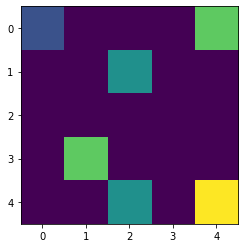

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[1.91115119 5.3056668  2.2506539  5.29165878 0.        ]
 [1.50715577 5.3056668  2.2506539  5.29165878 0.        ]
 [1.91115119 5.3056668  2.2506539  5.29165878 0.        ]
 [1.91115119 5.3056668  2.2506539  5.29165878 0.        ]
 [1.91115119 5.3056668  2.2506539  5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




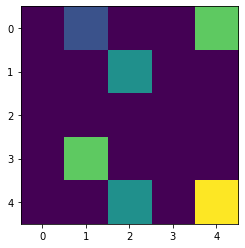

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.96573773 5.3056668  2.2506539  5.29165878 0.        ]
 [4.92533819 5.3056668  2.2506539  5.29165878 0.        ]
 [4.96573773 5.3056668  2.2506539  5.29165878 0.        ]
 [4.96573773 5.3056668  2.2506539  5.29165878 0.        ]
 [4.96573773 5.3056668  2.2506539  5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : down




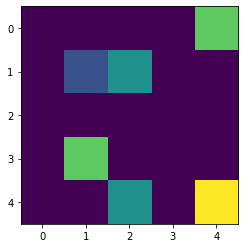

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.875, Average(last 10): 0.0


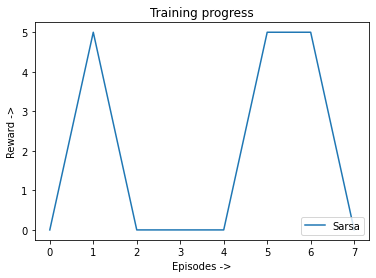

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.96573773 5.30518929 2.2506539  5.29165878 0.        ]
 [4.92533819 5.30518929 2.2506539  5.29165878 0.        ]
 [4.96573773 5.30518929 2.2506539  5.29165878 0.        ]
 [4.96573773 5.30518929 2.2506539  5.29165878 0.        ]
 [4.96573773 5.30518929 2.2506539  5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




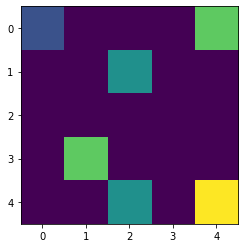

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[4.96573773 5.29253558 2.2506539  5.29165878 0.        ]
 [4.92533819 5.29253558 2.2506539  5.29165878 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29165878 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29165878 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29165878 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




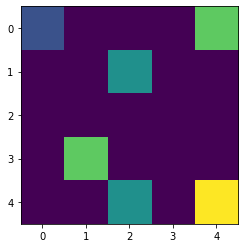

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.96573773 5.29253558 2.2506539  5.29197157 0.        ]
 [4.92533819 5.29253558 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29253558 2.2506539  5.29197157 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




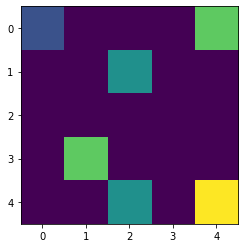

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.96573773 5.29205925 2.2506539  5.29197157 0.        ]
 [4.92533819 5.29205925 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29205925 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29205925 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29205925 2.2506539  5.29197157 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




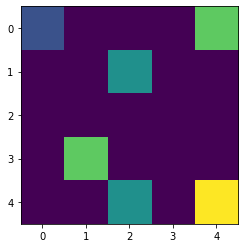

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[4.96573773 5.29158297 2.2506539  5.29197157 0.        ]
 [4.92533819 5.29158297 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29158297 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29158297 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29158297 2.2506539  5.29197157 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




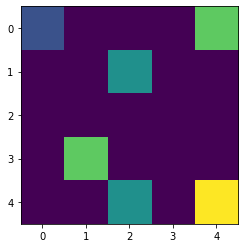

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[4.96573773 5.29145643 2.2506539  5.29197157 0.        ]
 [4.92533819 5.29145643 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29197157 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29197157 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




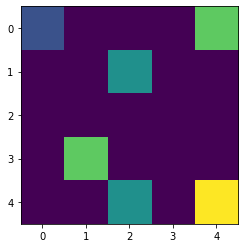

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[4.96573773 5.29145643 2.2506539  5.29149529 0.        ]
 [4.92533819 5.29145643 2.2506539  5.29149529 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29149529 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29149529 0.        ]
 [4.96573773 5.29145643 2.2506539  5.29149529 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




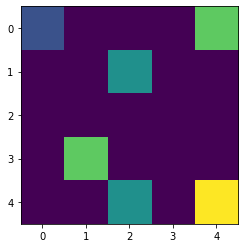

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[4.96573773 5.29145643 2.2506539  4.99786657 0.        ]
 [4.92533819 5.29145643 2.2506539  4.96151062 0.        ]
 [4.96573773 5.29145643 2.2506539  4.99786657 0.        ]
 [4.96573773 5.29145643 2.2506539  4.99786657 0.        ]
 [4.96573773 5.29145643 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




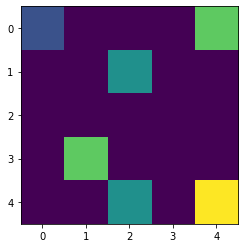

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.25840833 5.29145643 2.2506539  4.99786657 0.        ]
 [5.25436838 5.29145643 2.2506539  4.96151062 0.        ]
 [5.25840833 5.29145643 2.2506539  4.99786657 0.        ]
 [5.25840833 5.29145643 2.2506539  4.99786657 0.        ]
 [5.25840833 5.29145643 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




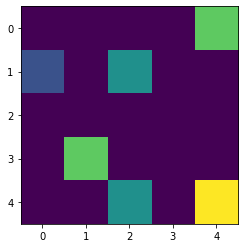

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.25840833 5.2909802  2.2506539  4.99786657 0.        ]
 [5.25436838 5.2909802  2.2506539  4.96151062 0.        ]
 [5.25840833 5.2909802  2.2506539  4.99786657 0.        ]
 [5.25840833 5.2909802  2.2506539  4.99786657 0.        ]
 [5.25840833 5.2909802  2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




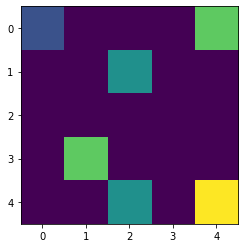

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.6666666666666667, Average(last 10): 0.0


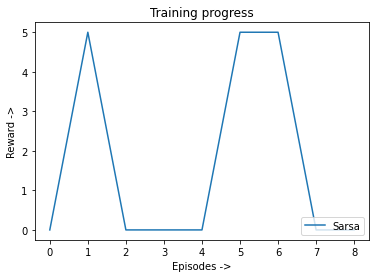

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.2909802  2.2506539  4.99786657 0.        ]
 [5.28684283 5.2909802  2.2506539  4.96151062 0.        ]
 [5.28724683 5.2909802  2.2506539  4.99786657 0.        ]
 [5.28724683 5.2909802  2.2506539  4.99786657 0.        ]
 [5.28724683 5.2909802  2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




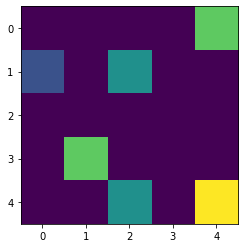

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.29050401 2.2506539  4.99786657 0.        ]
 [5.28684283 5.29050401 2.2506539  4.96151062 0.        ]
 [5.28724683 5.29050401 2.2506539  4.99786657 0.        ]
 [5.28724683 5.29050401 2.2506539  4.99786657 0.        ]
 [5.28724683 5.29050401 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




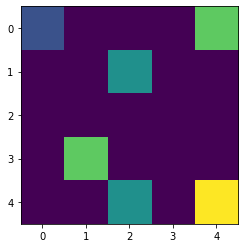

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.29002787 2.2506539  4.99786657 0.        ]
 [5.28684283 5.29002787 2.2506539  4.96151062 0.        ]
 [5.28724683 5.29002787 2.2506539  4.99786657 0.        ]
 [5.28724683 5.29002787 2.2506539  4.99786657 0.        ]
 [5.28724683 5.29002787 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




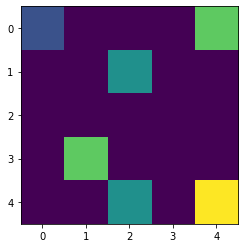

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.28955177 2.2506539  4.99786657 0.        ]
 [5.28684283 5.28955177 2.2506539  4.96151062 0.        ]
 [5.28724683 5.28955177 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28955177 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28955177 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




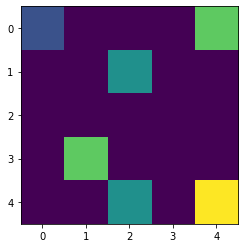

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.28907571 2.2506539  4.99786657 0.        ]
 [5.28684283 5.28907571 2.2506539  4.96151062 0.        ]
 [5.28724683 5.28907571 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28907571 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28907571 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




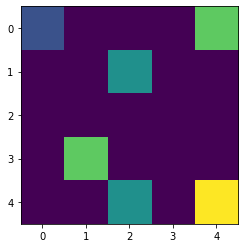

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.28859969 2.2506539  4.99786657 0.        ]
 [5.28684283 5.28859969 2.2506539  4.96151062 0.        ]
 [5.28724683 5.28859969 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28859969 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28859969 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




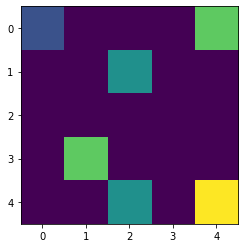

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[5.28724683 5.28812372 2.2506539  4.99786657 0.        ]
 [5.28684283 5.28812372 2.2506539  4.96151062 0.        ]
 [5.28724683 5.28812372 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28812372 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28812372 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




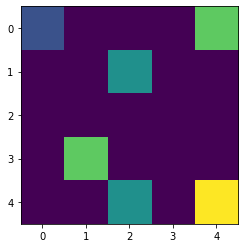

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[5.28724683 5.28685866 2.2506539  4.99786657 0.        ]
 [5.28684283 5.2864951  2.2506539  4.96151062 0.        ]
 [5.28724683 5.28685866 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28685866 2.2506539  4.99786657 0.        ]
 [5.28724683 5.28685866 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




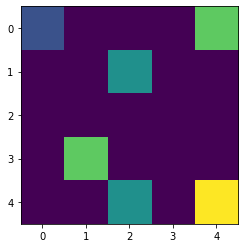

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[2.55411064 5.28685866 2.2506539  4.99786657 0.        ]
 [2.55407024 5.2864951  2.2506539  4.96151062 0.        ]
 [2.55411064 5.28685866 2.2506539  4.99786657 0.        ]
 [2.55411064 5.28685866 2.2506539  4.99786657 0.        ]
 [2.55411064 5.28685866 2.2506539  4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




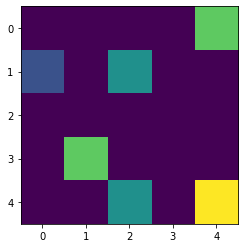

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[2.55411064 5.28685866 4.98276237 4.99786657 0.        ]
 [2.55407024 5.2864951  4.98276237 4.96151062 0.        ]
 [2.55411064 5.28685866 4.98276237 4.99786657 0.        ]
 [2.55411064 5.28685866 4.98276237 4.99786657 0.        ]
 [2.55411064 5.28685866 4.98276237 4.99786657 0.        ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : right




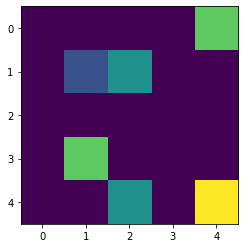

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 1.5, Average(last 10): 0.0


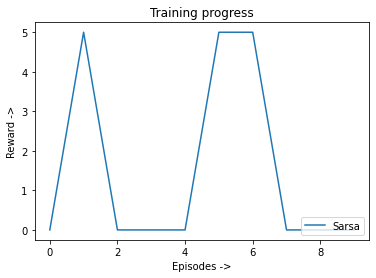

No handles with labels found to put in legend.


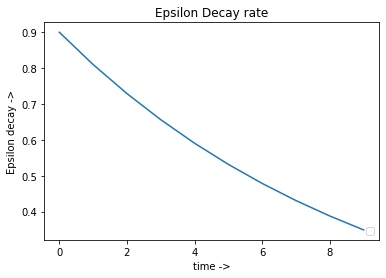

In [ ]:
# gamma = 0.9999
epsilon = 1
eps_decay_factor = 0.9
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.9999
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)

*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




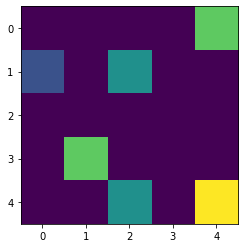

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




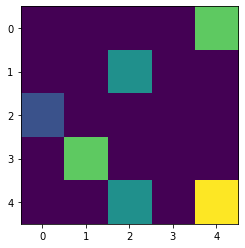

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




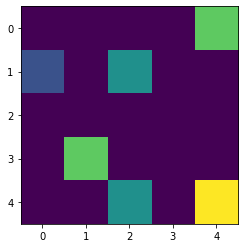

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




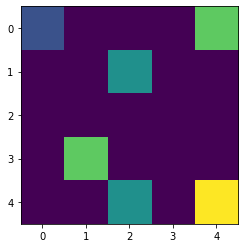

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




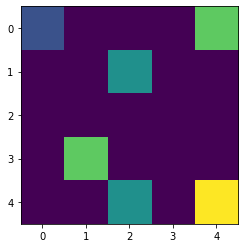

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




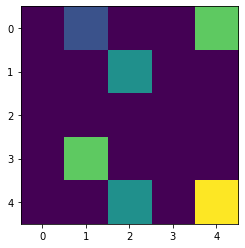

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




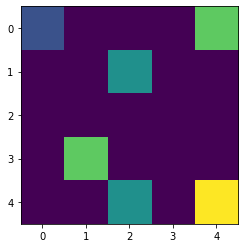

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




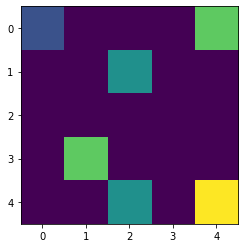

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 1]
The action chosen is : right




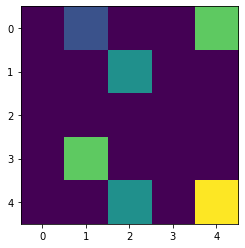

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 1 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 1]
The action chosen is : down




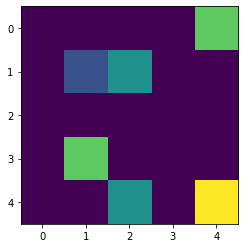

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.5
After 10, average score: 0.0, Average(last 10): 0.0


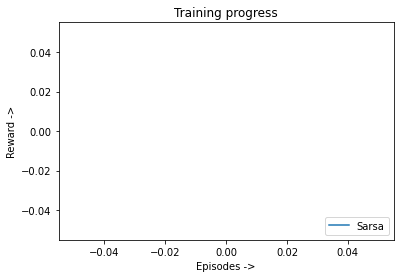

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




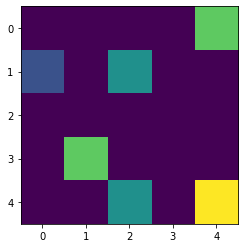

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




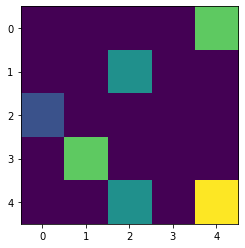

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




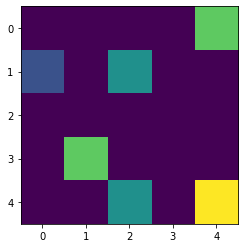

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




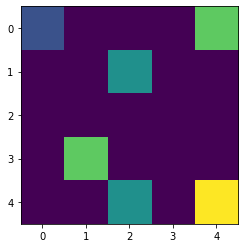

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




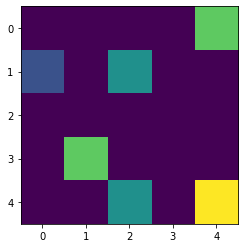

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




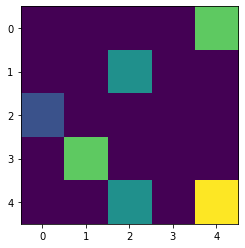

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




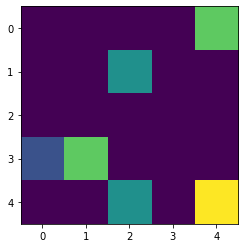

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




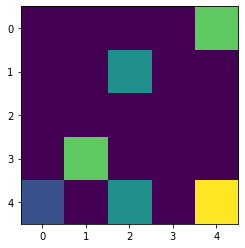

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




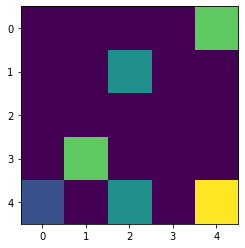

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




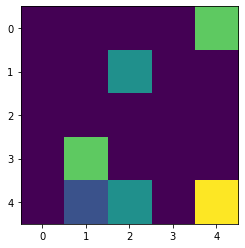

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


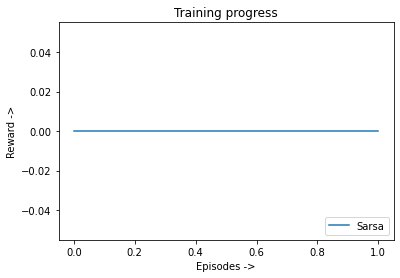

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




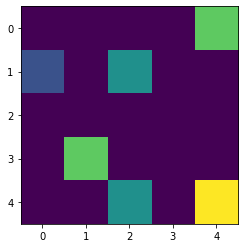

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




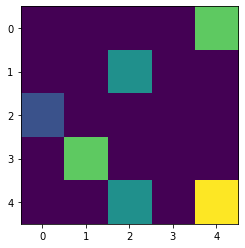

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




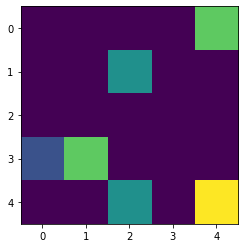

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




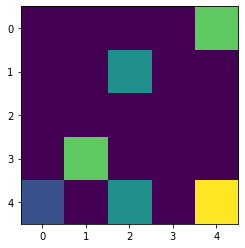

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




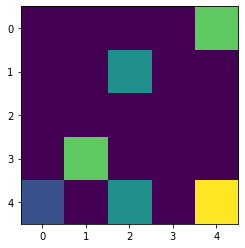

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : up




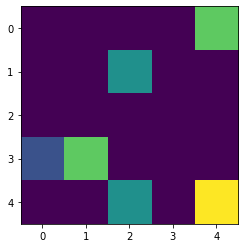

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




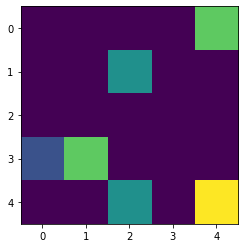

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




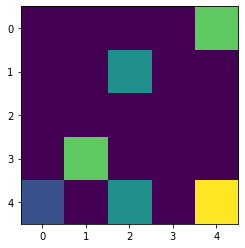

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




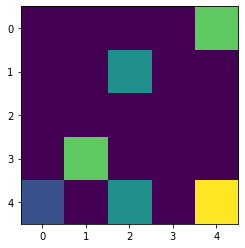

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




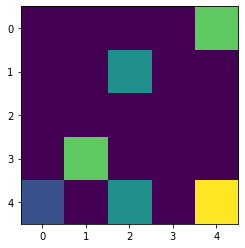

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


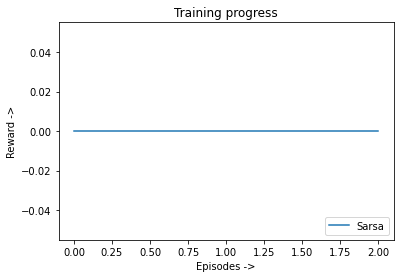

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




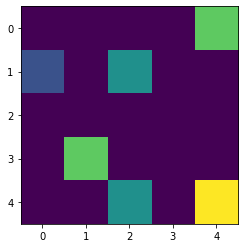

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




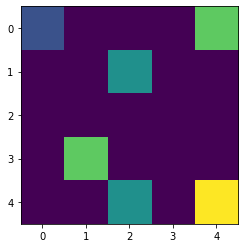

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




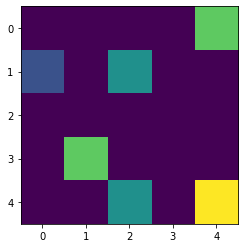

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




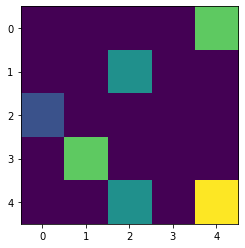

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




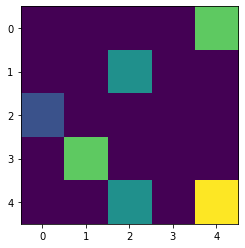

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




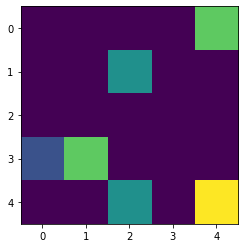

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




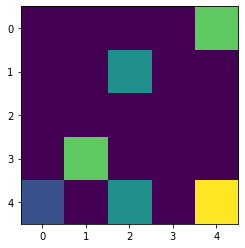

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




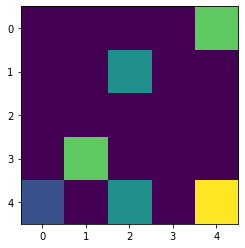

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




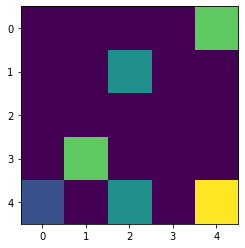

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




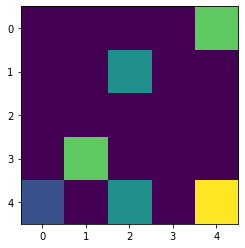

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


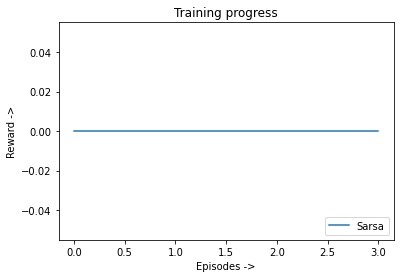

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




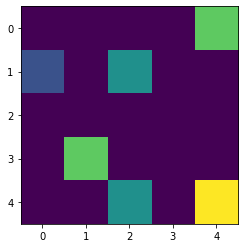

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




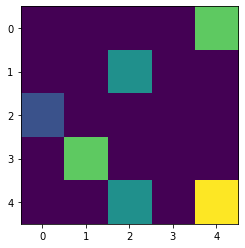

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




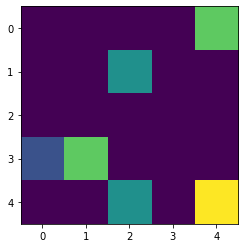

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




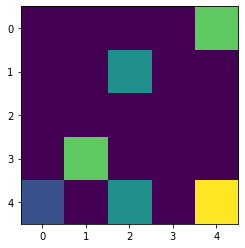

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




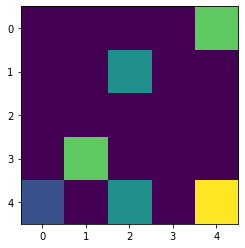

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




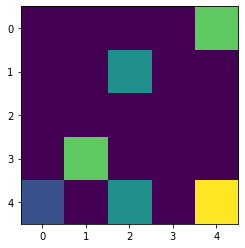

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




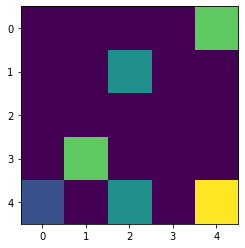

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




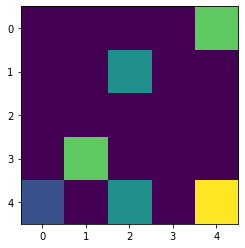

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




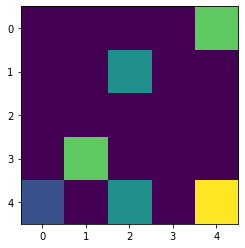

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




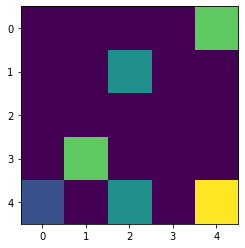

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


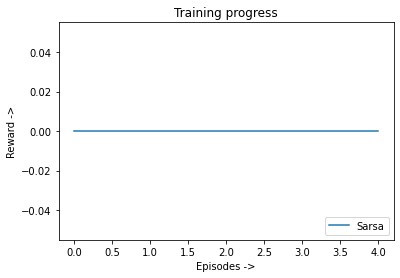

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




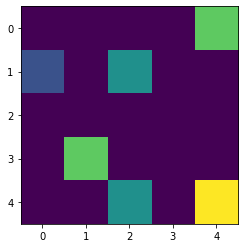

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




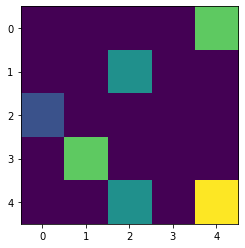

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




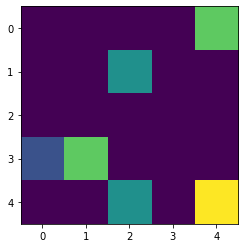

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




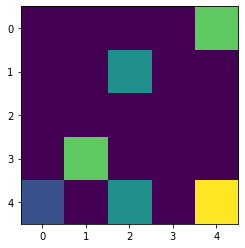

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




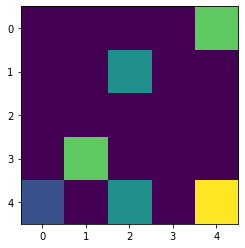

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




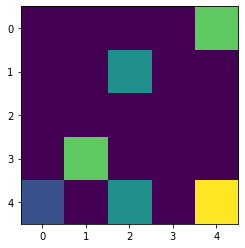

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




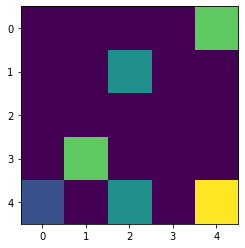

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




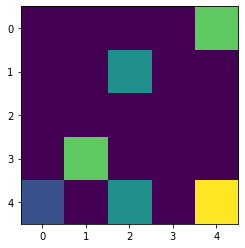

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




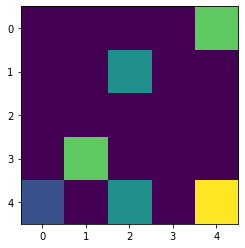

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




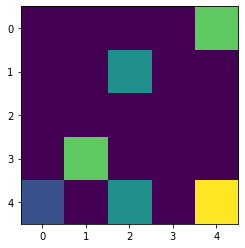

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


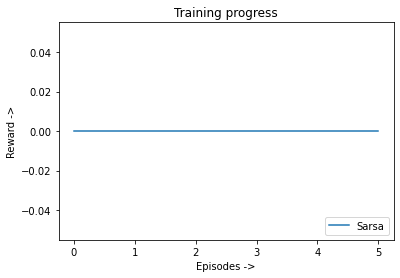

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




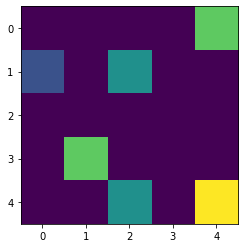

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




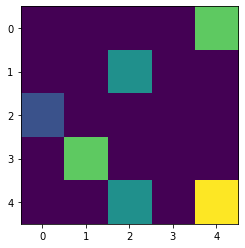

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




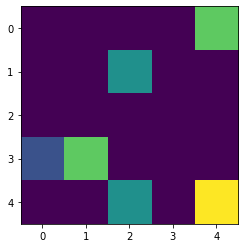

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




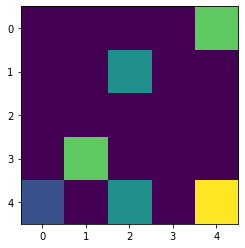

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




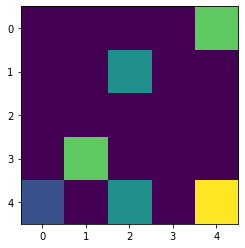

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




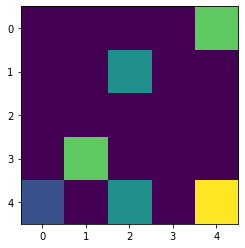

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




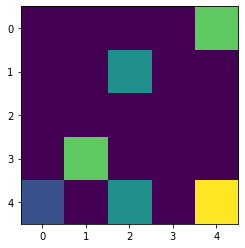

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




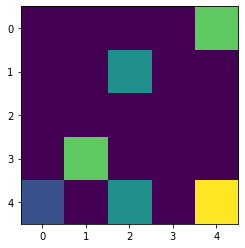

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




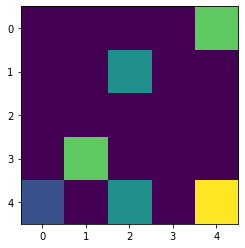

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




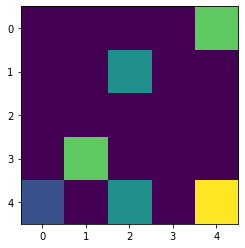

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


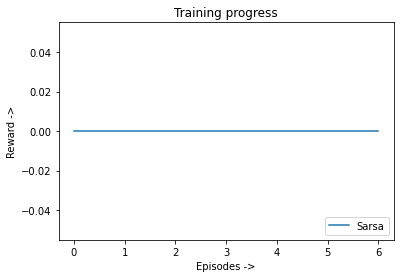

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




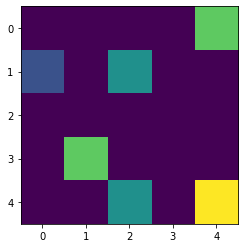

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




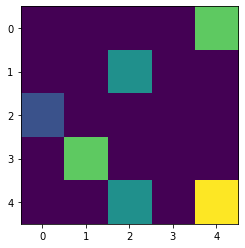

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




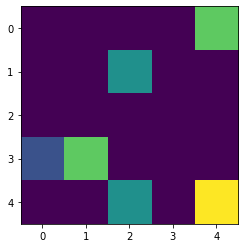

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




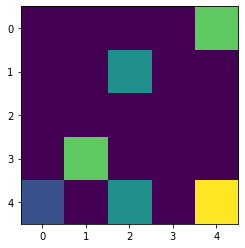

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




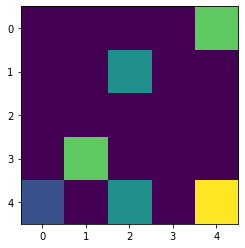

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




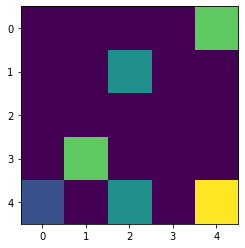

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




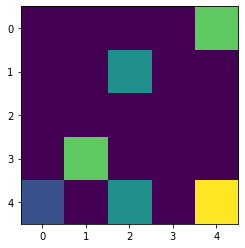

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




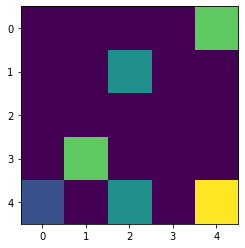

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




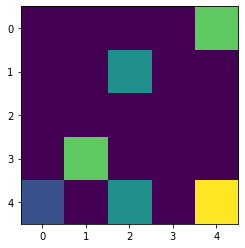

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




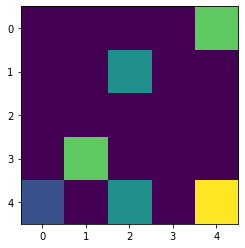

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


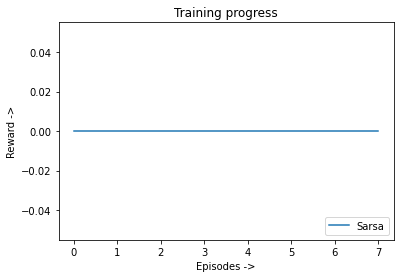

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




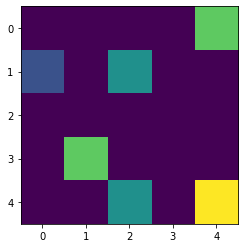

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




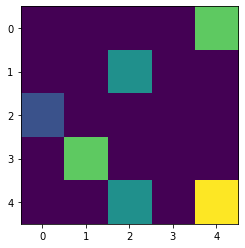

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




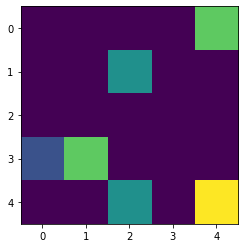

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




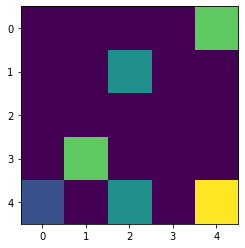

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




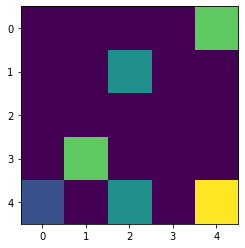

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




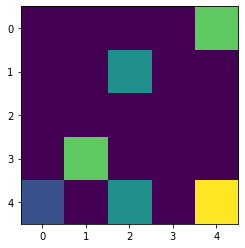

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




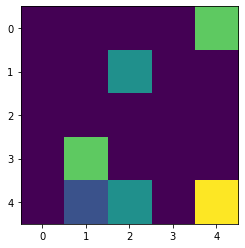

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




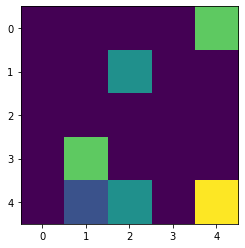

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




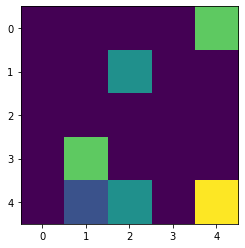

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




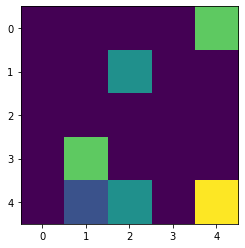

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


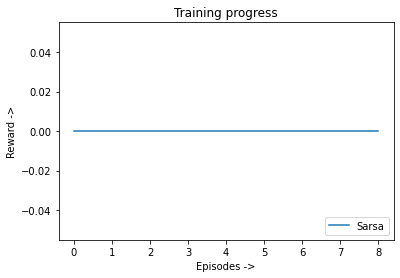

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




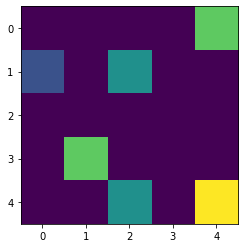

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




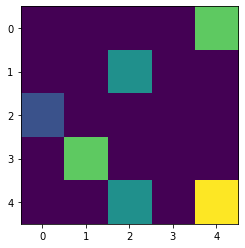

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




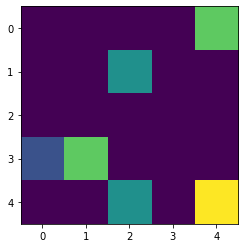

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




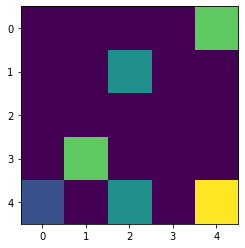

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




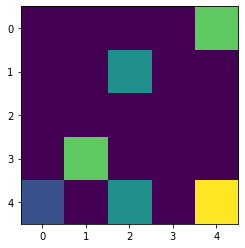

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




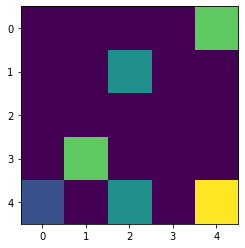

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




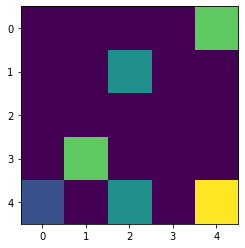

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




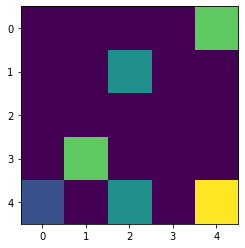

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




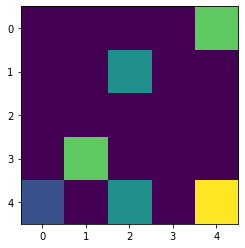

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




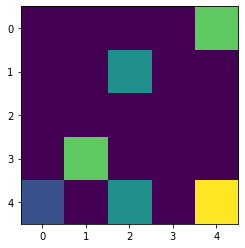

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


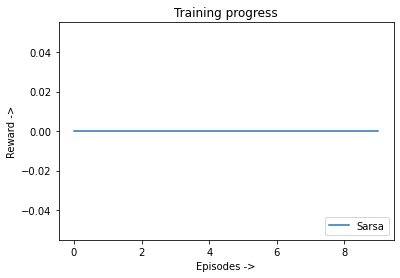

No handles with labels found to put in legend.


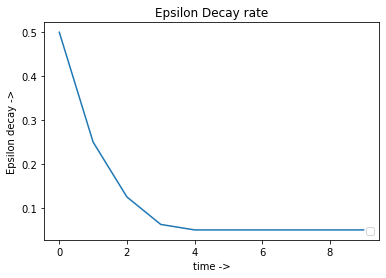

In [ ]:
#Changing the epsilon decay dactor
epsilon = 1
eps_decay_factor = 0.5
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.95
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)


*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




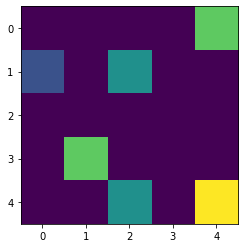

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




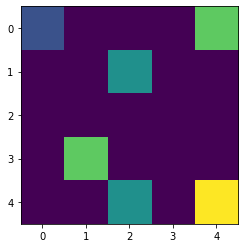

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




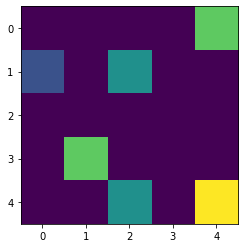

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




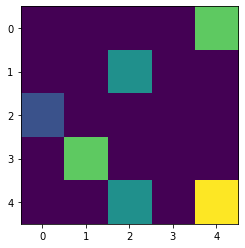

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




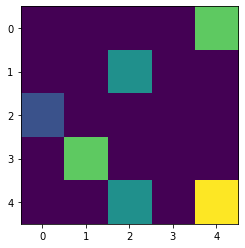

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




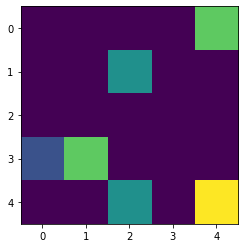

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : left




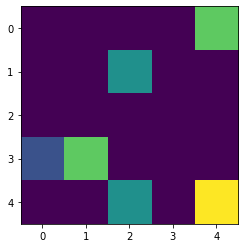

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




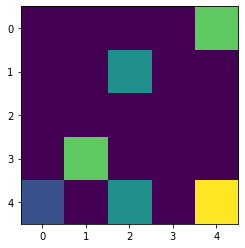

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




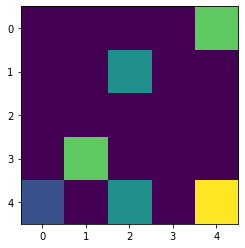

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




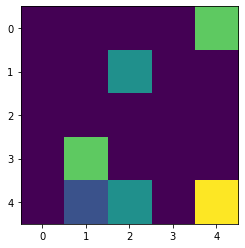

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.3
After 10, average score: 0.0, Average(last 10): 0.0


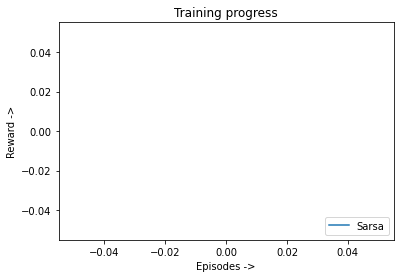

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




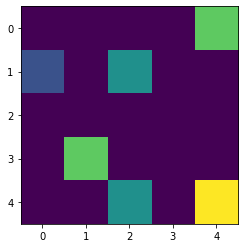

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




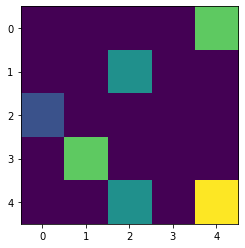

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




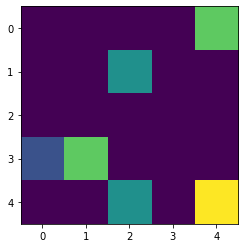

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : right




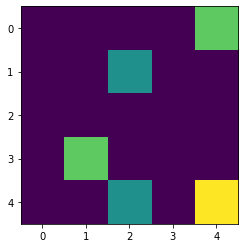

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




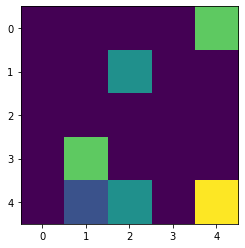

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




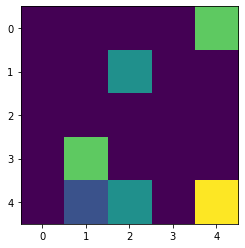

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 3

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




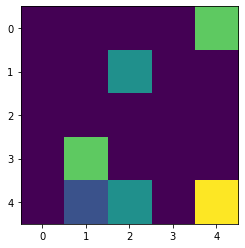

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




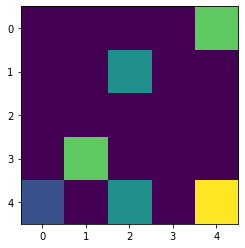

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




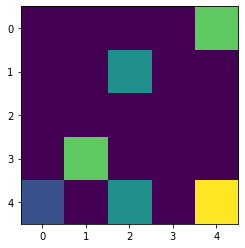

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




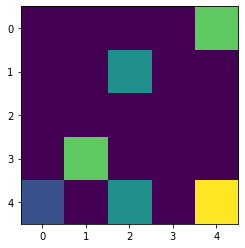

<IPython.core.display.Javascript object>

The total reward for the episode is :-2
Evaluation score is :-0.2

After 10, average score: -1.0, Average(last 10): 0.0


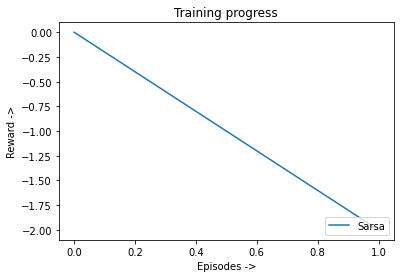

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




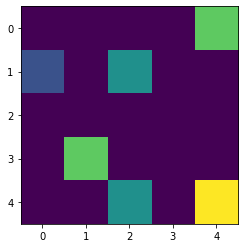

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




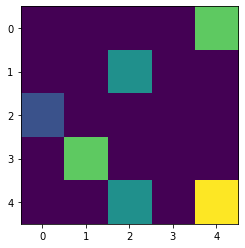

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




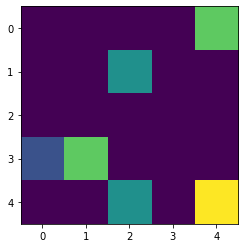

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]
 [ 0.   0.  -1.8  0.   0. ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




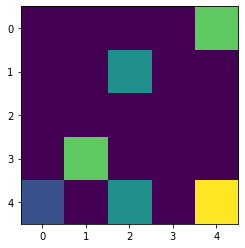

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[-1.539  0.    -1.8    0.     0.   ]
 [-1.539  0.    -1.8    0.     0.   ]
 [-1.539  0.    -1.8    0.     0.   ]
 [-1.539  0.    -1.8    0.     0.   ]
 [-1.539  0.    -1.8    0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




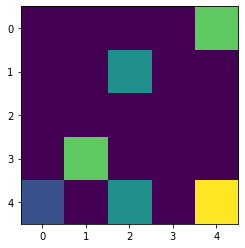

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.539  0.    -0.18   0.     0.   ]
 [-1.539  0.    -0.18   0.     0.   ]
 [-1.539  0.    -0.18   0.     0.   ]
 [-1.539  0.    -0.18   0.     0.   ]
 [-1.539  0.    -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




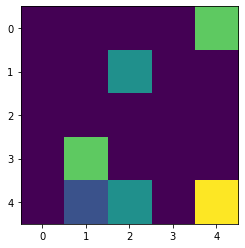

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : -2
The agent current position is : [3 1]
The action chosen is : up




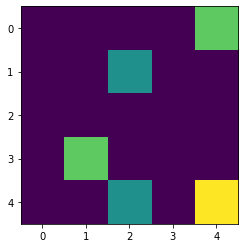

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 1]
The action chosen is : up




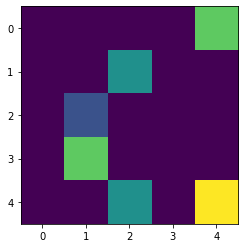

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




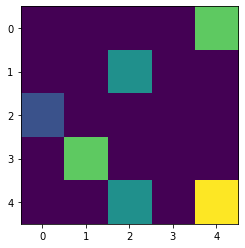

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




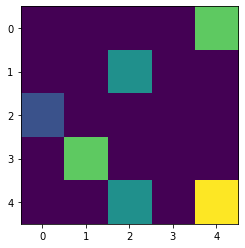

<IPython.core.display.Javascript object>

The total reward for the episode is :-2
Evaluation score is :-0.2

After 10, average score: -1.3333333333333333, Average(last 10): 0.0


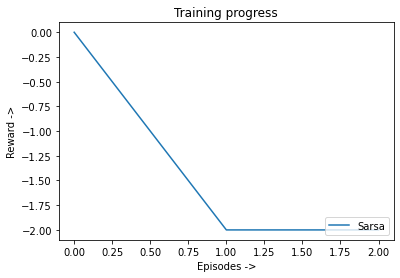

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




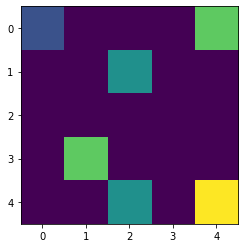

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




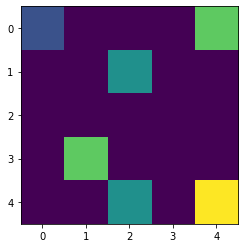

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




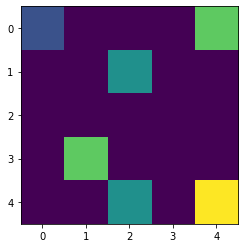

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




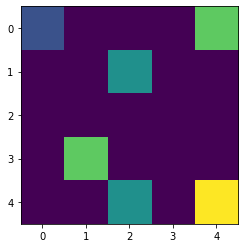

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




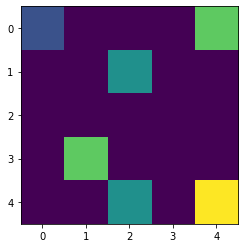

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




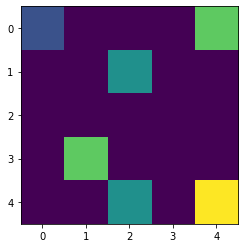

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




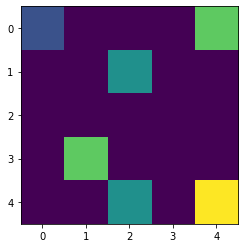

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




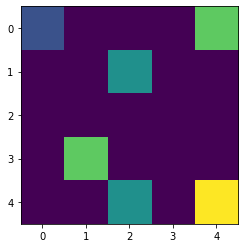

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




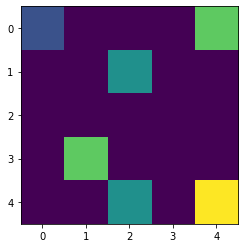

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




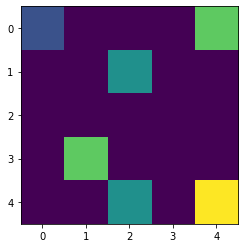

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -1.0, Average(last 10): 0.0


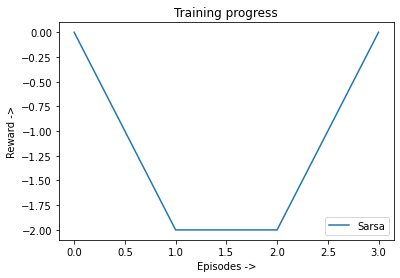

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




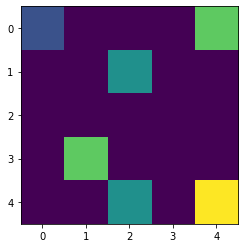

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




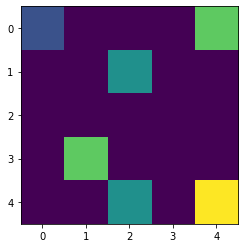

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




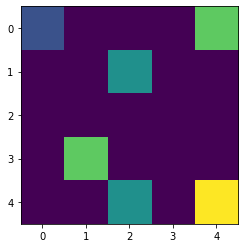

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




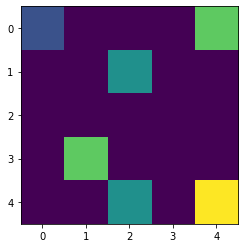

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




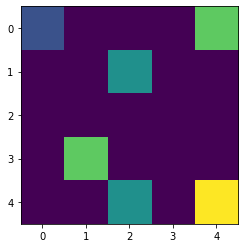

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




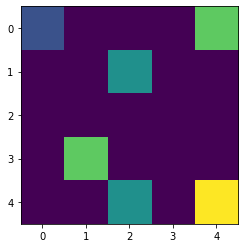

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




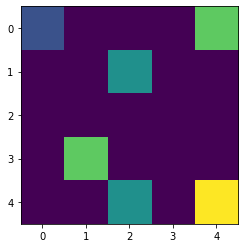

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




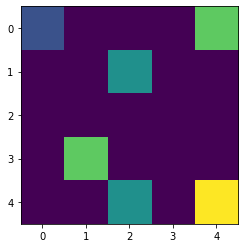

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




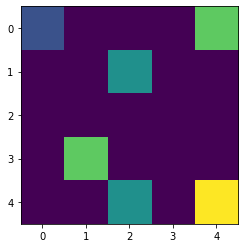

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




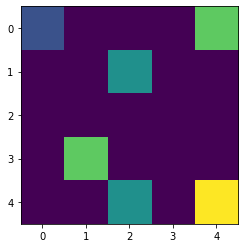

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.8, Average(last 10): 0.0


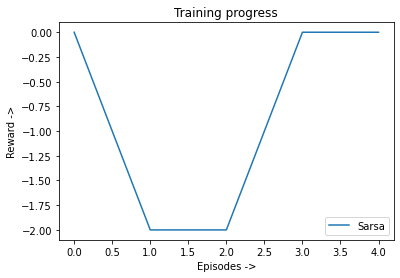

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




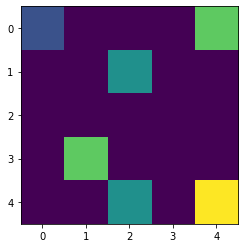

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




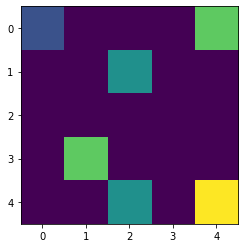

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




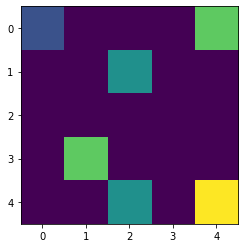

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




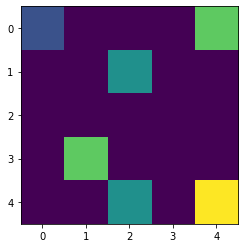

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




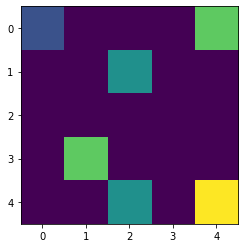

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




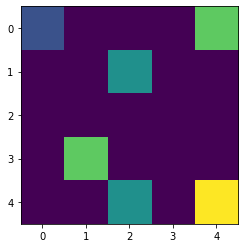

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




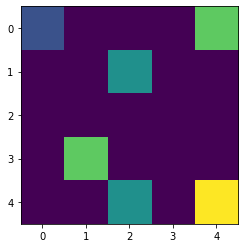

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




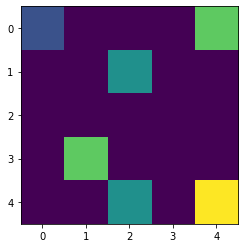

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




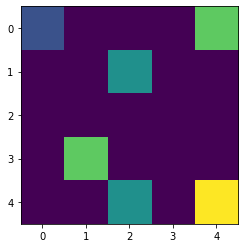

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




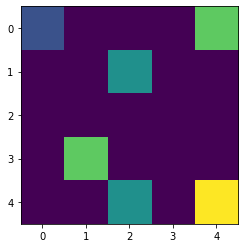

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.6666666666666666, Average(last 10): 0.0


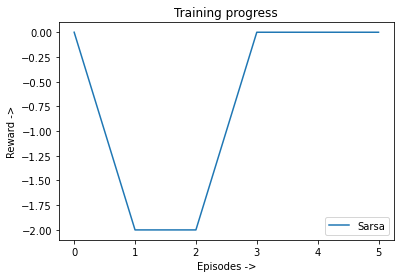

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




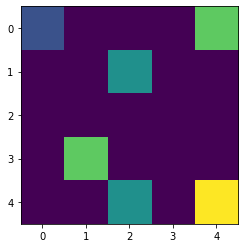

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




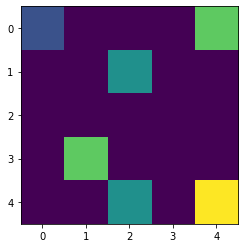

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




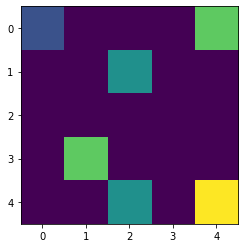

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




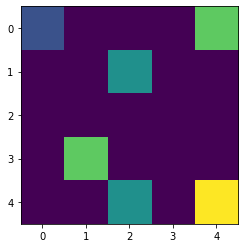

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




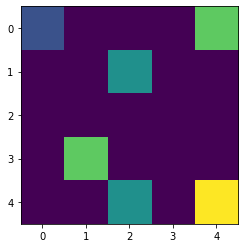

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




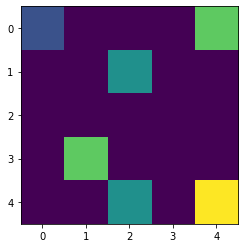

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




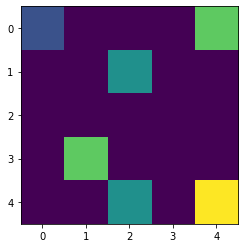

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




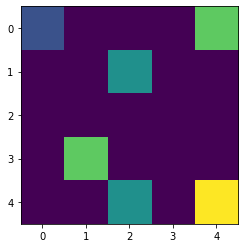

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




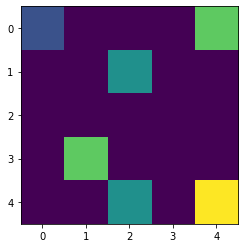

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




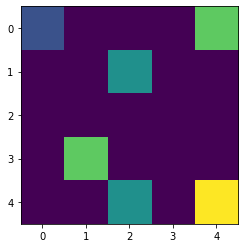

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.5714285714285714, Average(last 10): 0.0


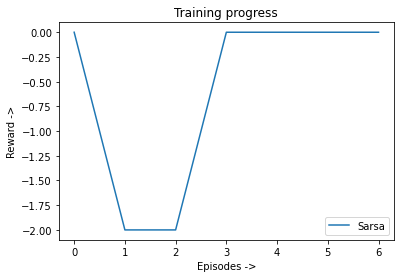

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




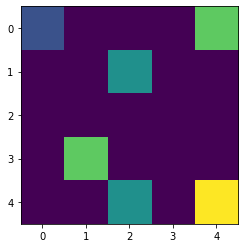

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




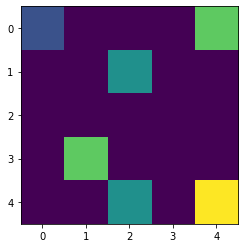

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




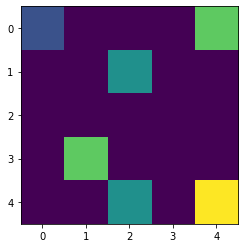

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




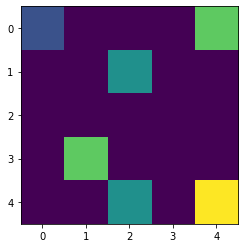

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




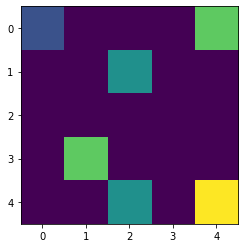

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




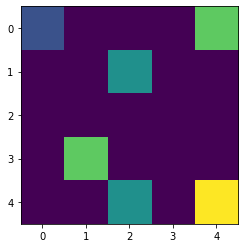

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




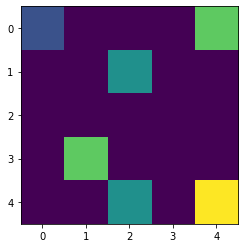

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




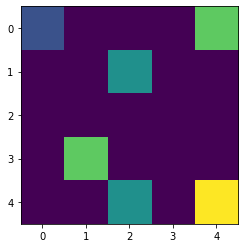

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




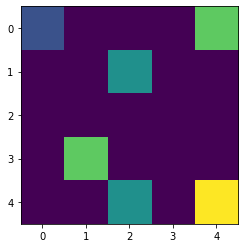

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -1.8   -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]
 [-1.539 -0.18  -0.18   0.     0.   ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




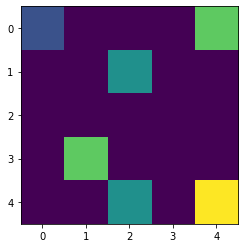

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.5, Average(last 10): 0.0


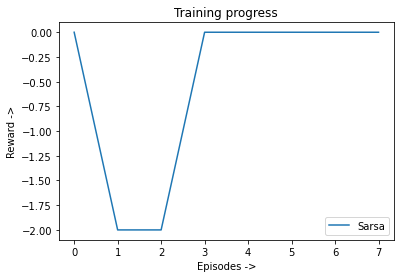

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[-1.539  -0.18   -0.18   -0.1539  0.    ]
 [-1.539  -1.8    -0.18   -1.539   0.    ]
 [-1.539  -0.18   -0.18   -0.1539  0.    ]
 [-1.539  -0.18   -0.18   -0.1539  0.    ]
 [-1.539  -0.18   -0.18   -0.1539  0.    ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




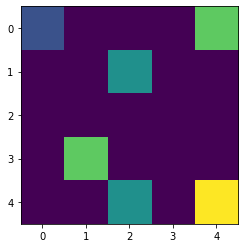

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.1539     0.       ]
 [-1.539     -1.495845  -0.18      -1.539      0.       ]
 [-1.539     -0.1495845 -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.1539     0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




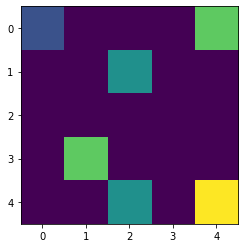

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




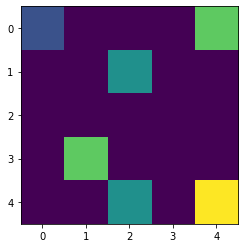

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




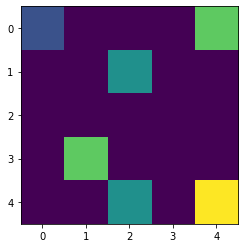

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




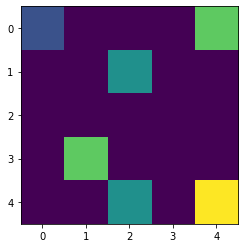

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




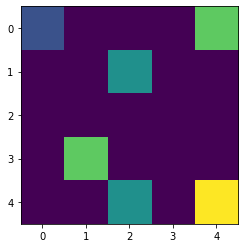

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




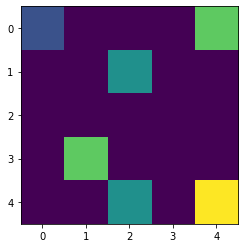

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




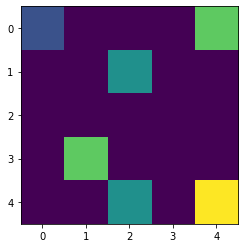

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




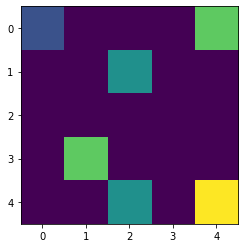

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




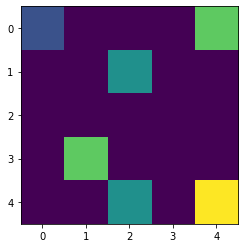

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.4444444444444444, Average(last 10): 0.0


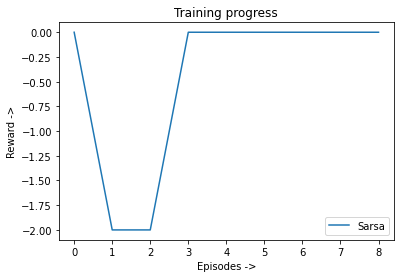

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




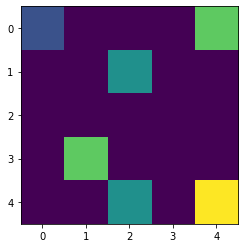

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




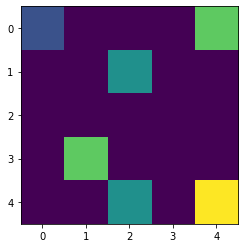

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




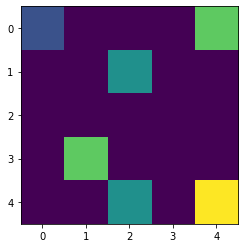

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




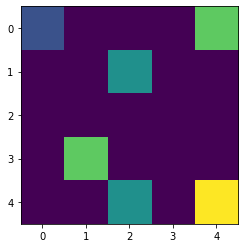

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




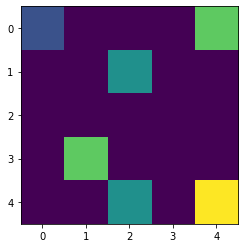

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




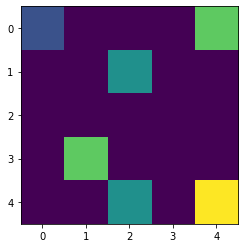

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




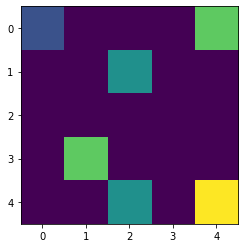

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




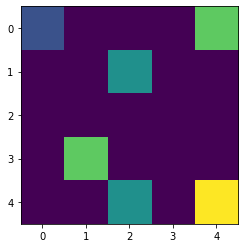

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




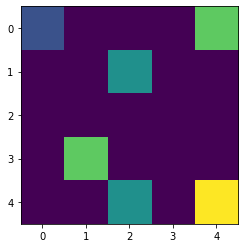

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 4

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 4

The Q table is :
 [[-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -1.495845  -0.18      -0.1539     0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]
 [-1.539     -0.1495845 -0.18      -0.01539    0.       ]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




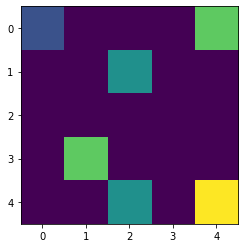

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: -0.4, Average(last 10): 0.0


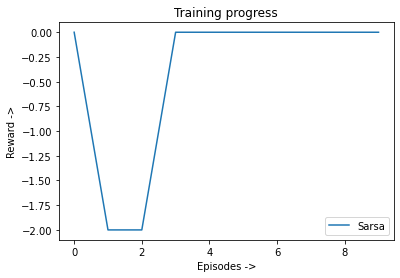

No handles with labels found to put in legend.


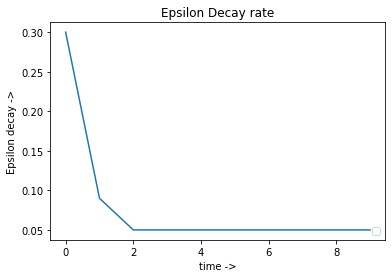

In [ ]:
#epsilon decay factor = 0.3
epsilon = 1
eps_decay_factor = 0.3
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.95
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)

*******For episode : 0*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




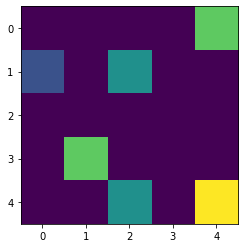

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




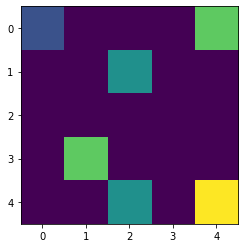

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




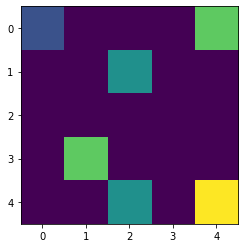

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




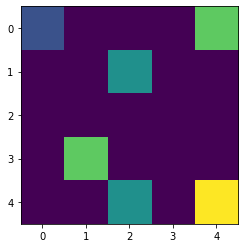

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




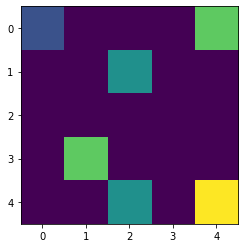

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




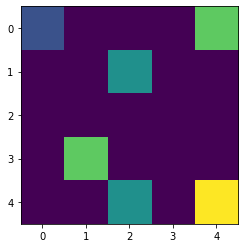

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




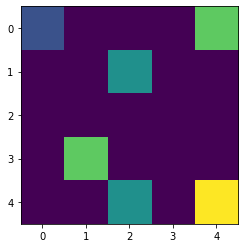

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




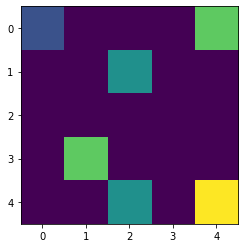

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




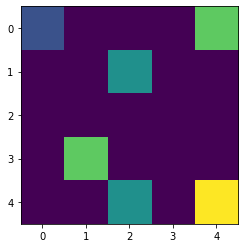

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




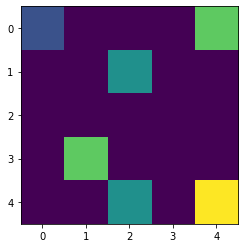

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0
Episode: 0/10, score: 0, Average(last 10): 0.0, epsilon: 0.65
After 10, average score: 0.0, Average(last 10): 0.0


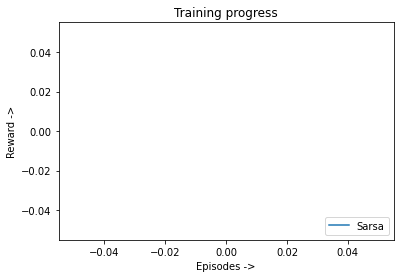

*******For episode : 1*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : left




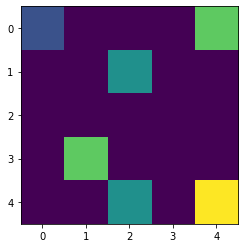

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [0 0]
The action chosen is : up




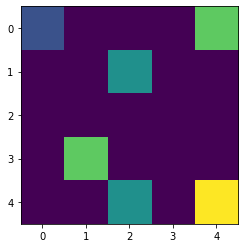

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




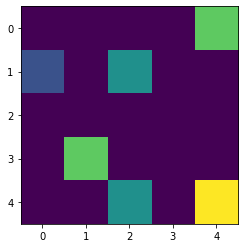

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




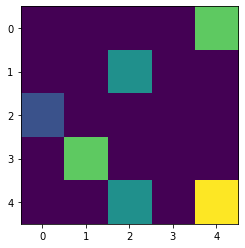

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




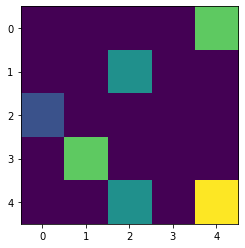

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




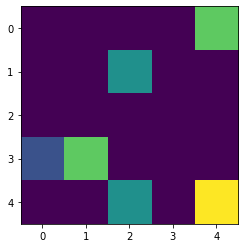

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




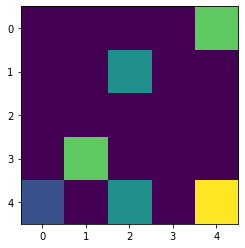

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




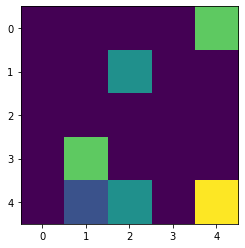

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




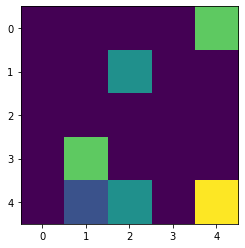

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




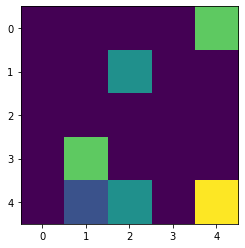

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


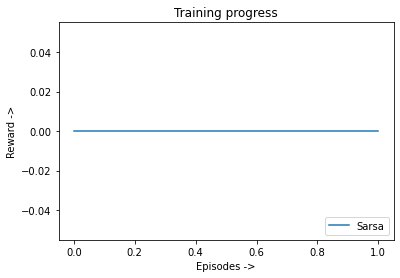

*******For episode : 2*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




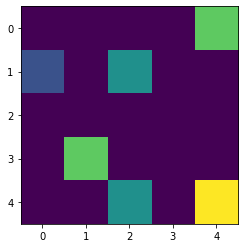

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




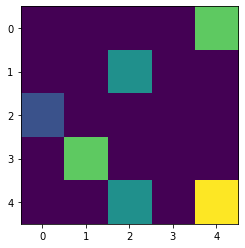

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : left




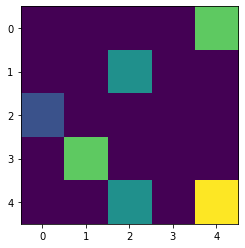

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




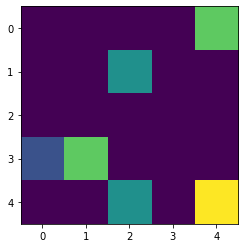

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




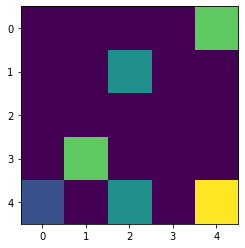

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




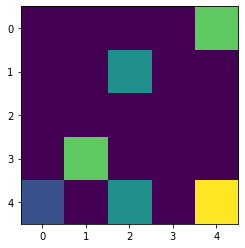

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




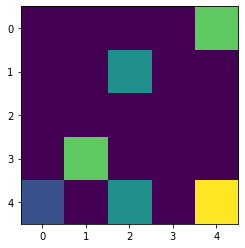

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




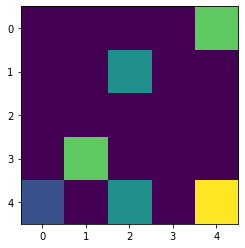

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : up




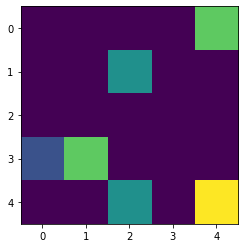

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




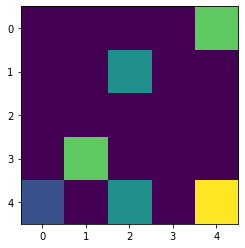

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


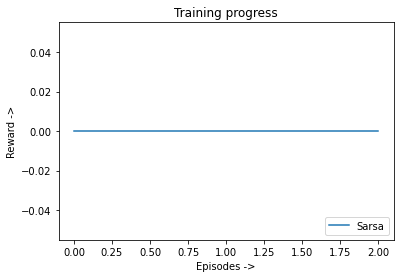

*******For episode : 3*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




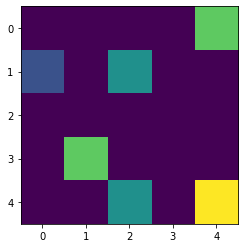

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




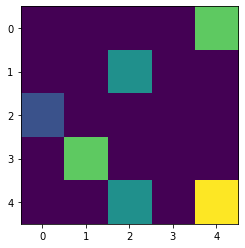

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




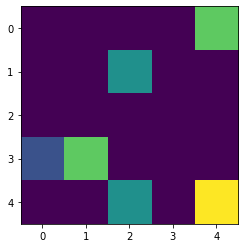

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




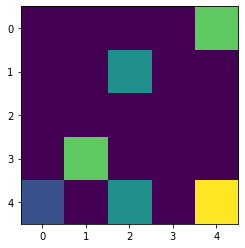

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




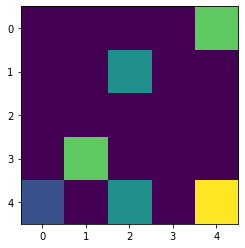

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




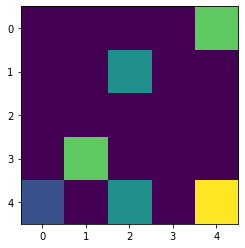

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




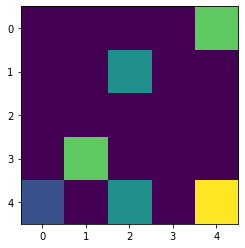

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




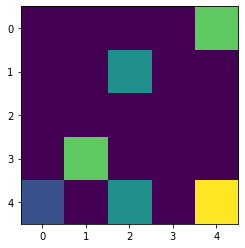

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




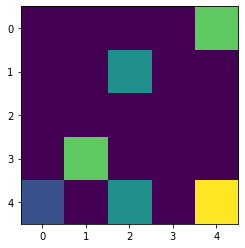

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




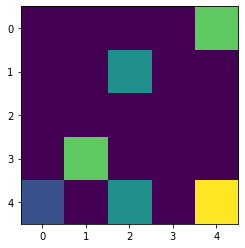

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


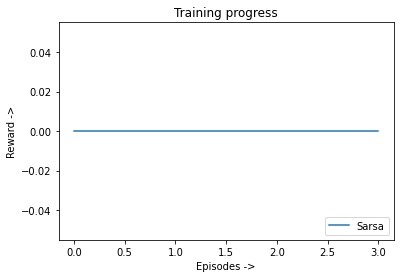

*******For episode : 4*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




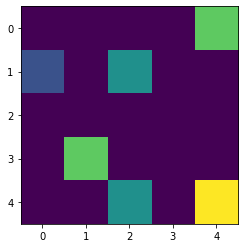

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




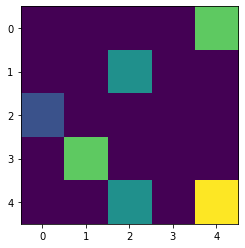

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : up




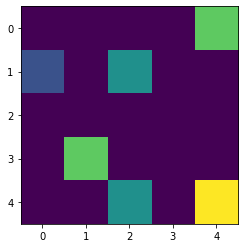

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




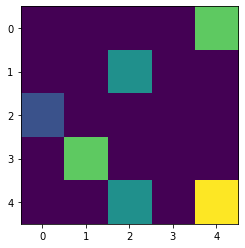

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




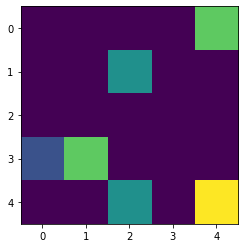

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




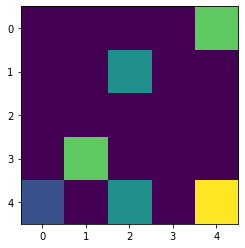

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




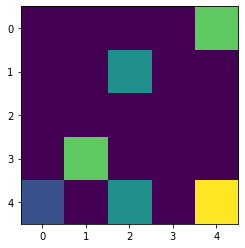

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 3

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




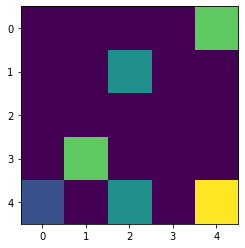

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 3

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : left




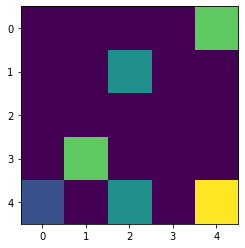

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




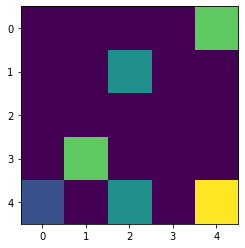

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


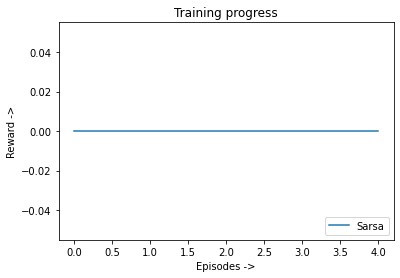

*******For episode : 5*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




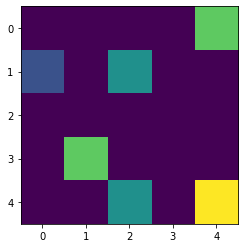

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




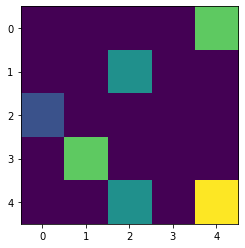

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 1

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




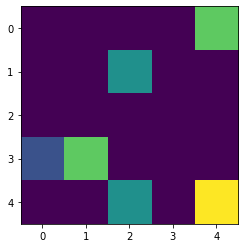

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 1

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : up




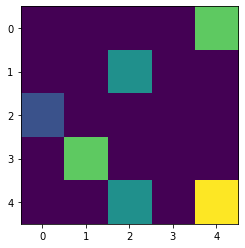

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




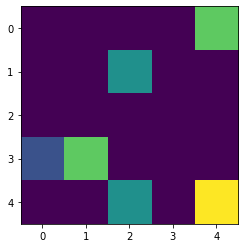

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




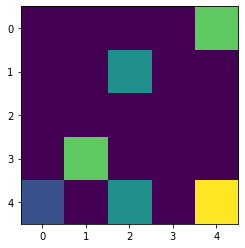

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




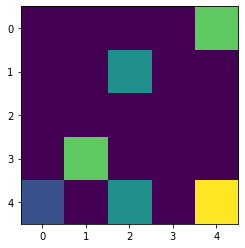

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




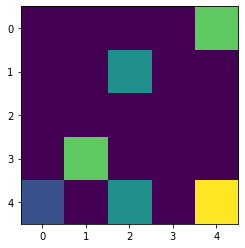

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




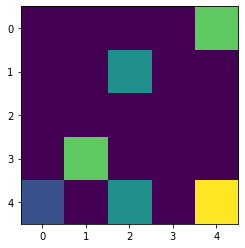

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




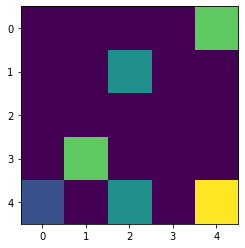

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


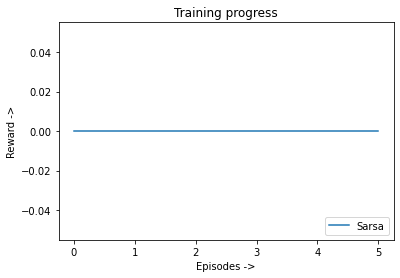

*******For episode : 6*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




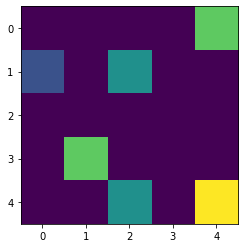

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




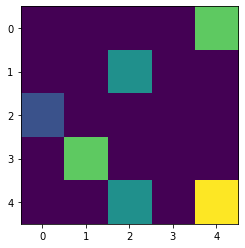

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




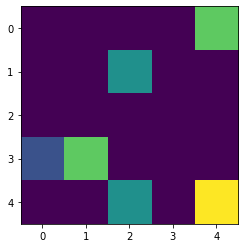

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




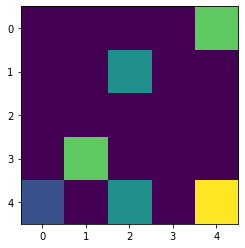

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




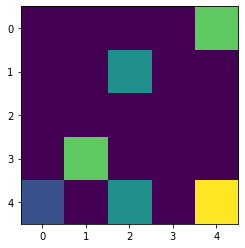

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




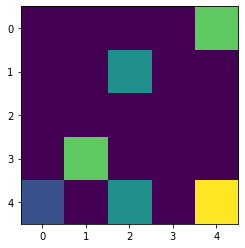

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




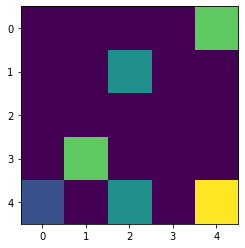

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 2

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




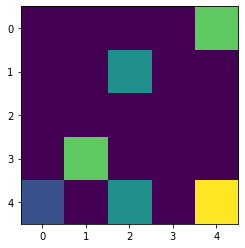

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 2

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : right




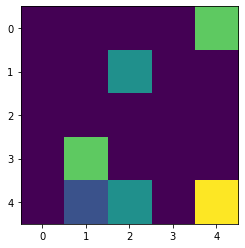

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 1]
The action chosen is : down




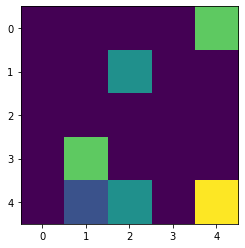

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


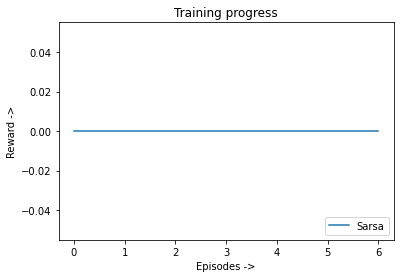

*******For episode : 7*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




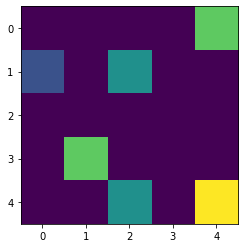

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




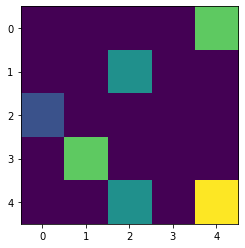

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




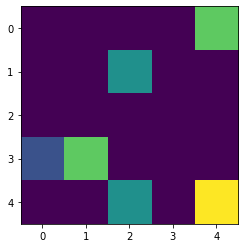

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




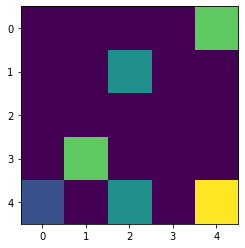

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




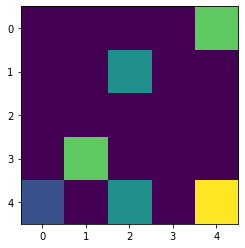

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




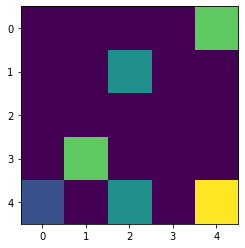

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




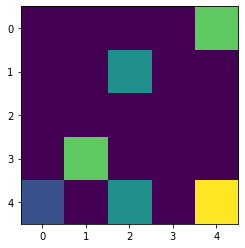

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




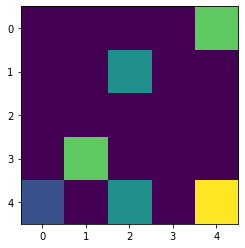

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




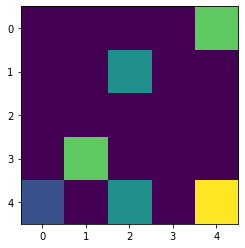

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




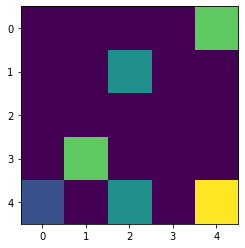

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


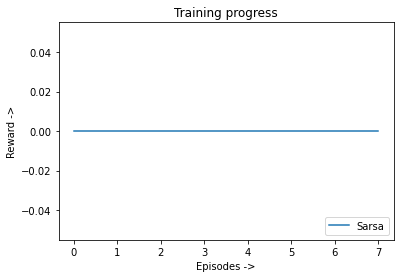

*******For episode : 8*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




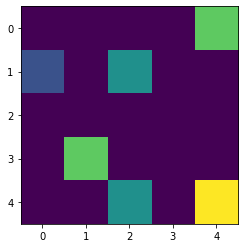

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




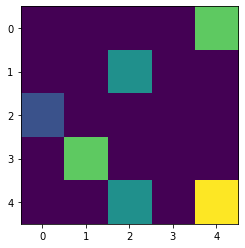

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




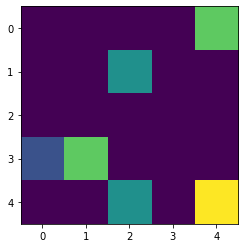

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




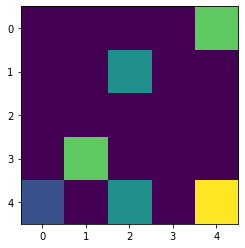

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




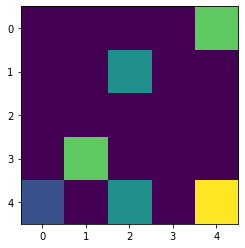

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




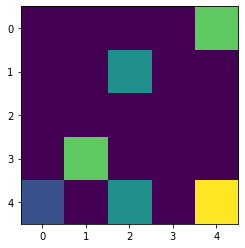

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




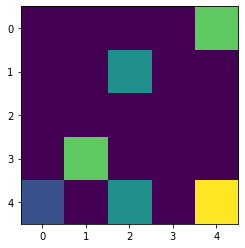

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




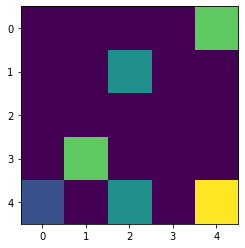

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




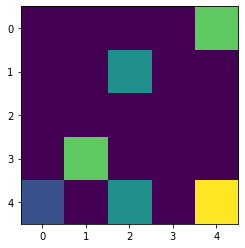

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




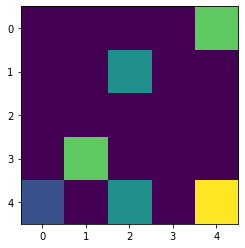

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


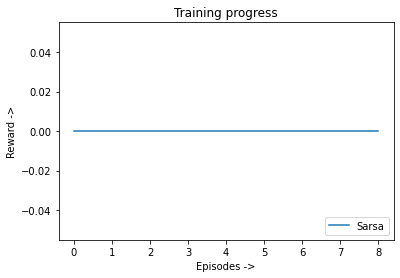

*******For episode : 9*******
*******At step : 0******

The state 1 is : [1 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [1 0]
The action chosen is : down




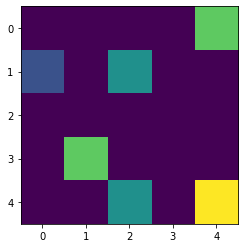

<IPython.core.display.Javascript object>

*******At step : 1******

The state 1 is : [0 0 0 0 3 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [2 0]
The action chosen is : down




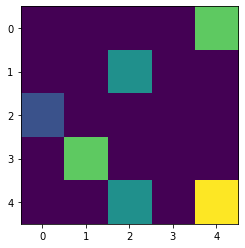

<IPython.core.display.Javascript object>

*******At step : 2******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [3 0]
The action chosen is : down




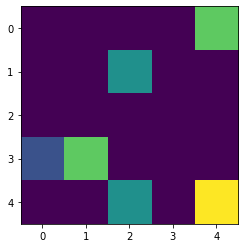

<IPython.core.display.Javascript object>

*******At step : 3******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 1 3 0 0 0 0 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




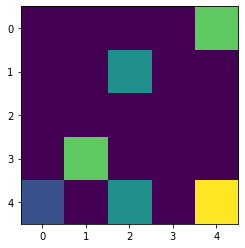

<IPython.core.display.Javascript object>

*******At step : 4******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




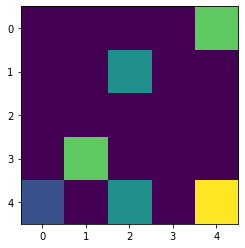

<IPython.core.display.Javascript object>

*******At step : 5******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




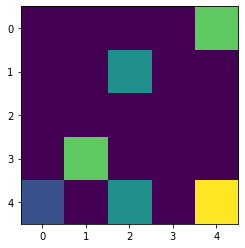

<IPython.core.display.Javascript object>

*******At step : 6******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




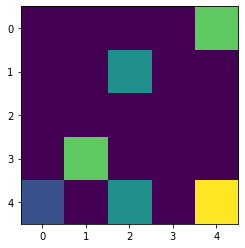

<IPython.core.display.Javascript object>

*******At step : 7******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




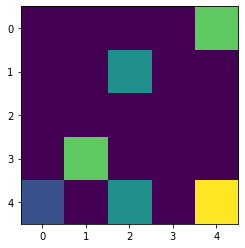

<IPython.core.display.Javascript object>

*******At step : 8******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




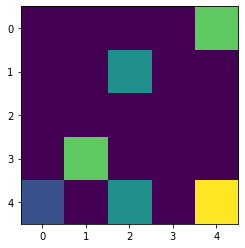

<IPython.core.display.Javascript object>

*******At step : 9******

The state 1 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 1 is : 0

The state 2 is : [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 4]

 The action 2 is : 0

The Q table is :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
********************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********************************************************************************


The reward is : 0
The agent current position is : [4 0]
The action chosen is : down




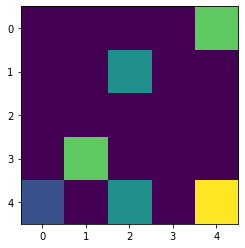

<IPython.core.display.Javascript object>

The total reward for the episode is :0
Evaluation score is :0.0

After 10, average score: 0.0, Average(last 10): 0.0


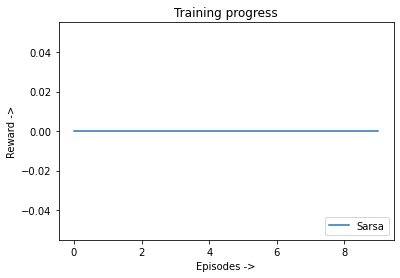

No handles with labels found to put in legend.


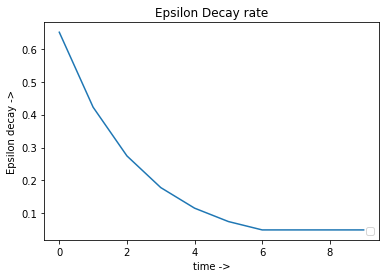

In [ ]:
#epsilon decay factor = 0.65
epsilon = 1
eps_decay_factor = 0.65
total_episodes = 10
max_steps = 20
eps_min = 0.05
alpha = 0.9
gamma = 0.95
 
#Initializing the Q_table-matrix
Q_table = np.zeros((5,5))

# SARSA agent to solve the grid
SARSA_Agent(epsilon,eps_decay_factor,total_episodes,max_steps,alpha,gamma)